# DS 151 Final Project
## Airlines Flight Performance Analysis
### Emanuele Bossi
**Short Abstract**: Comprehensive study on Flight Performance, considering US domestic flights over 2023, with the aim of predicting flights delay.

**Assumption(s)**: You are working in the Data Science Dept. of an US Carrier (American Airlines) and you would like to improve the quality of the service offered by the company in order to (1) reduce costs related to delays and (2) improve passengers satisfaction.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Data Collection

In [2]:
# Import databases
jan_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/01_2023.csv')
feb_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/02_2023.csv')
mar_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/03_2023.csv')
apr_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/04_2023.csv')
may_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/05_2023.csv')
jun_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/06_2023.csv')
jul_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/07_2023.csv')
aug_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/08_2023.csv')
sep_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/09_2023.csv')
oct_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/10_2023.csv')
nov_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/11_2023.csv')
dec_2023 = pd.read_csv('/Users/emanuelebossi/Desktop/Final Project/12_2023.csv')

In [3]:
# Concatenate all dfs into a single df (outer join - default)
df = pd.concat([jan_2023, feb_2023, mar_2023, apr_2023, may_2023, jun_2023, jul_2023, aug_2023, sep_2023, oct_2023, nov_2023, dec_2023], ignore_index=True)

### Data Exploration (Summary)

In [4]:
# Print head of df
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,0.0,NaN,0.0,33.0,144.0,6.0,0.0,18.0,0.0,0.0
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,0.0,NaN,0.0,91.0,529.0,NaN,NaN,NaN,NaN,NaN
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,0.0,NaN,0.0,57.0,377.0,NaN,NaN,NaN,NaN,NaN
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,0.0,NaN,0.0,66.0,377.0,NaN,NaN,NaN,NaN,NaN
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,0.0,NaN,0.0,45.0,220.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print tail of df
df.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
6847894,2023,12,31,7,YX,5817,10721,BOS,"Boston, MA",MA,...,0.0,NaN,0.0,38.0,184.0,NaN,NaN,NaN,NaN,NaN
6847895,2023,12,31,7,YX,5818,10693,BNA,"Nashville, TN",TN,...,0.0,NaN,0.0,111.0,764.0,NaN,NaN,NaN,NaN,NaN
6847896,2023,12,31,7,YX,5837,12953,LGA,"New York, NY",NY,...,0.0,NaN,0.0,117.0,764.0,NaN,NaN,NaN,NaN,NaN
6847897,2023,12,31,7,YX,5844,13485,MSN,"Madison, WI",WI,...,0.0,NaN,0.0,111.0,812.0,NaN,NaN,NaN,NaN,NaN
6847898,2023,12,31,7,YX,5845,11057,CLT,"Charlotte, NC",NC,...,0.0,NaN,0.0,76.0,544.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Print columns of df
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [7]:
# Print example of row (see information collected for each flight)
df.iloc[0]

YEAR                              2023
MONTH                                1
DAY_OF_MONTH                         1
DAY_OF_WEEK                          7
OP_UNIQUE_CARRIER                   9E
OP_CARRIER_FL_NUM                 4630
ORIGIN_AIRPORT_ID                11337
ORIGIN                             DLH
ORIGIN_CITY_NAME            Duluth, MN
ORIGIN_STATE_ABR                    MN
ORIGIN_STATE_NM              Minnesota
DEST_AIRPORT_ID                  13487
DEST                               MSP
DEST_CITY_NAME         Minneapolis, MN
DEST_STATE_ABR                      MN
DEST_STATE_NM                Minnesota
CRS_DEP_TIME                       510
DEP_TIME                         516.0
DEP_DELAY                          6.0
DEP_DELAY_NEW                      6.0
CRS_ARR_TIME                       626
ARR_TIME                         650.0
ARR_DELAY                         24.0
ARR_DELAY_NEW                     24.0
CANCELLED                          0.0
CANCELLATION_CODE        

In [8]:
# Print summary of df (just a selection of relevant info for the analysis)
print('Total flights: ', len(df))
print('Total days analyzed: ', len(df.groupby(['MONTH', 'DAY_OF_MONTH'])))
print('Total carriers analyzed: ', len(df['OP_UNIQUE_CARRIER'].unique()))
print('Total different flights number analyzed: ', len(df['OP_CARRIER_FL_NUM'].unique()))
print('Total different origin airports analyzed: ', len(df['ORIGIN'].unique()))
print('Total different destination airports analyzed: ', len(df['DEST'].unique()))
print('Total number of flights cancelled: ', len(df[df['CANCELLED'] == 1]))
print('Total number of flights delayed: ', len(df[df['ARR_DELAY_NEW'] > 0]))
print('Total number of flights delayed due to carrier: ', len(df[df['CARRIER_DELAY'] > 0]))
print('Total number of flights delayed due to weather: ', len(df[df['WEATHER_DELAY'] > 0]))
print('Total number of flights delayed due to NAS: ', len(df[df['NAS_DELAY'] > 0]))
print('Total number of flights delayed due to security: ', len(df[df['SECURITY_DELAY'] > 0]))
print('Total number of flights delayed due to previous flight delayed: ', len(df[df['LATE_AIRCRAFT_DELAY'] > 0]))

Total flights:  6847899
Total days analyzed:  365
Total carriers analyzed:  15
Total different flights number analyzed:  6358
Total different origin airports analyzed:  350
Total different destination airports analyzed:  350
Total number of flights cancelled:  87943
Total number of flights delayed:  2472530
Total number of flights delayed due to carrier:  787890
Total number of flights delayed due to weather:  71999
Total number of flights delayed due to NAS:  660785
Total number of flights delayed due to security:  8148
Total number of flights delayed due to previous flight delayed:  711118


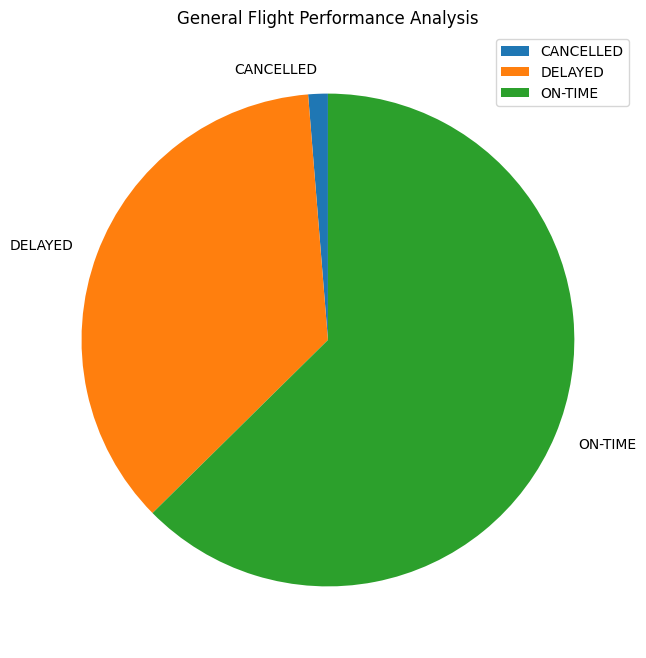

<Figure size 1200x800 with 0 Axes>

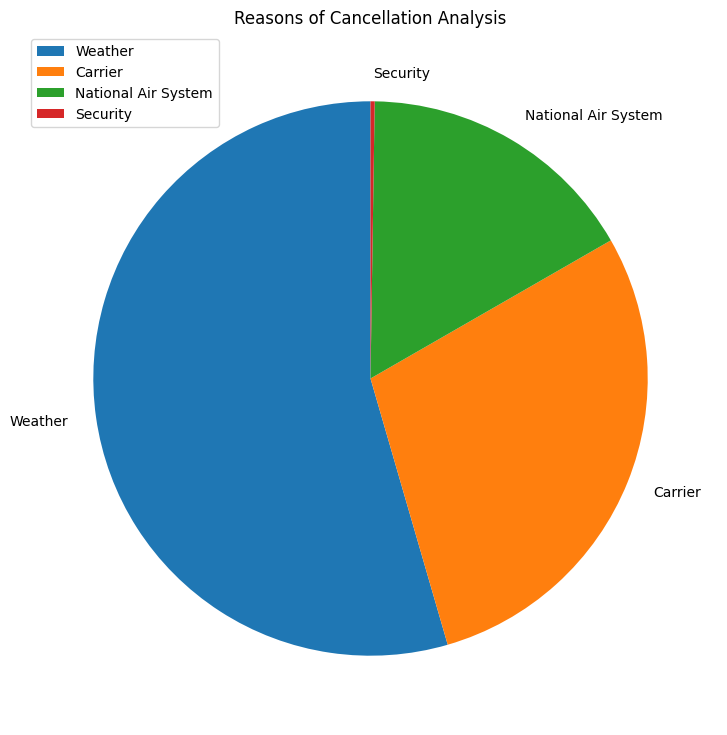

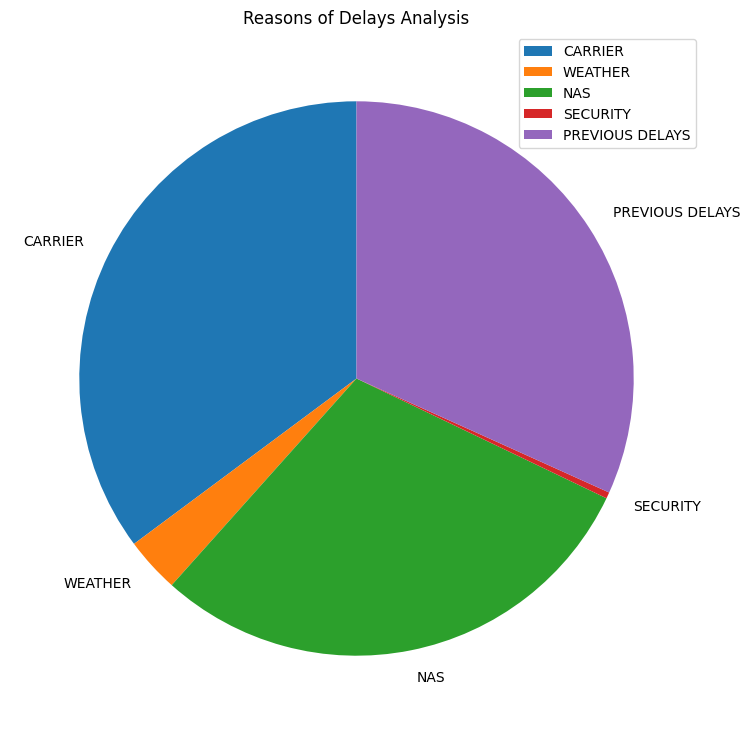

In [9]:
# Data Visulization of meaningful statistics reported in the cell above

# General Flight Performance Analysis
fig = plt.figure(figsize=(10,8))
plt.pie([len(df[df['CANCELLED'] == 1]), len(df[df['ARR_DELAY_NEW'] > 0]), len(df)-len(df[df['CANCELLED'] == 1])-len(df[df['ARR_DELAY_NEW'] > 0])], labels=['CANCELLED', 'DELAYED', 'ON-TIME'], startangle=90)
plt.title('General Flight Performance Analysis')
plt.legend()
plt.show();

# Reasons of Cancellation Analysis
fig = plt.figure(figsize=(12,8))
mapping = {'A': 'Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].replace(mapping)
fig = plt.figure(figsize=(12, 9))
plt.pie(df.dropna(subset=['CANCELLATION_CODE'])['CANCELLATION_CODE'].value_counts(), 
        labels=df.dropna(subset=['CANCELLATION_CODE'])['CANCELLATION_CODE'].value_counts().index, 
        startangle=90)
plt.title('Reasons of Cancellation Analysis')
plt.legend(loc='upper left')
plt.show();

# Reasons of Delays Analysis
fig = plt.figure(figsize=(12,9))
plt.pie([len(df[df['CARRIER_DELAY'] > 0]), len(df[df['WEATHER_DELAY'] > 0]), len(df[df['NAS_DELAY'] > 0]), len(df[df['SECURITY_DELAY'] > 0]), len(df[df['LATE_AIRCRAFT_DELAY'] > 0])], labels=['CARRIER', 'WEATHER', 'NAS', 'SECURITY', 'PREVIOUS DELAYS'], startangle=90)
plt.title('Reasons of Delays Analysis')
plt.legend()
plt.show();

### Data Pre-Processing

In [10]:
# Convert YEAR, MONTH, DAY_OF_MONTH into a unique column named DATE
df['DATE'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['DAY_OF_MONTH'].astype(str)
df['DATE'] = pd.to_datetime(df['DATE'])

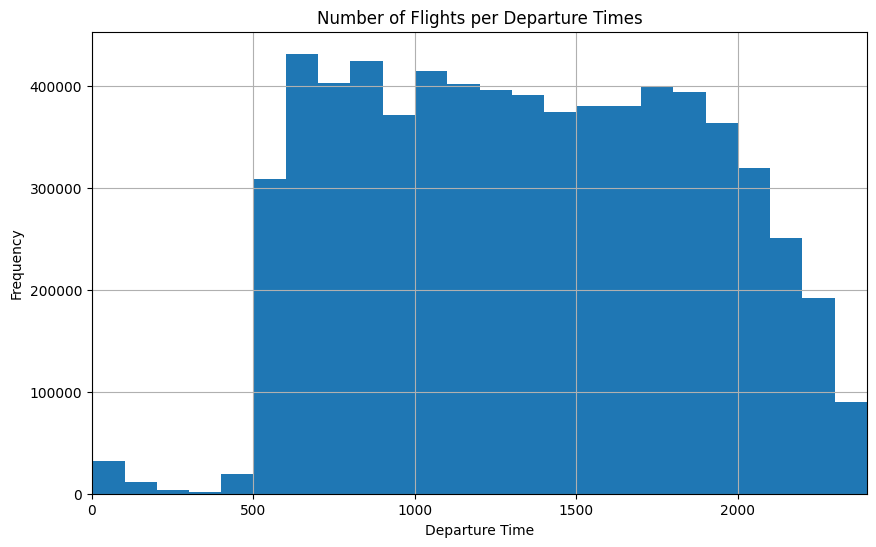

In [11]:
# Plot Number of Flights per Departure Times

fig = plt.figure(figsize=(10, 6))
df['DEP_TIME'].plot(kind='hist', bins=24)
plt.title('Number of Flights per Departure Times')
plt.xlabel('Departure Time')
plt.xlim(0,2400)
plt.ylabel('Frequency')
plt.grid()
plt.show();

In [12]:
# Add a column to identify if the flight departure time is MORNING, AFTERNOON, EVENING, NIGHT
def categorize_dep_time(dep_time):
    if (dep_time < 500) | (dep_time > 2200):
        return 'NIGHT'
    elif dep_time < 1200:
        return 'MORNING'
    elif dep_time < 1700:
        return 'AFTERNOON'
    else:
        return 'EVENING'

df['DEP_TIME_CAT'] = df['DEP_TIME'].apply(categorize_dep_time)

In [13]:
# Add a column that contains the minutes of the day of the departure (e.g., 1 day = 24hr*60min/hr = 1440min)

df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(str).str.pad(width=4, side='left', fillchar='0')
hour = df['CRS_DEP_TIME'].str.slice(0, 2).astype(int)
minute = df['CRS_DEP_TIME'].str.slice(2, 4).astype(int)
df['DEP_MIN'] = hour * 60 + minute

df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,DEP_TIME_CAT,DEP_MIN
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,33.0,144.0,6.0,0.0,18.0,0.0,0.0,2023-01-01,MORNING,310
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,91.0,529.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,330
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,57.0,377.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,540
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,66.0,377.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,663
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,45.0,220.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,390


In [14]:
# Add Delay Binary column (1 if ARR_DELAY_NEW >= 15, else 0)
df['DELAY_BIN'] = np.where(df['ARR_DELAY_NEW'] >= 15, 1, 0)
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,DEP_TIME_CAT,DEP_MIN,DELAY_BIN
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,144.0,6.0,0.0,18.0,0.0,0.0,2023-01-01,MORNING,310,1
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,529.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,330,0
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,377.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,540,0
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,377.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,663,0
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,220.0,NaN,NaN,NaN,NaN,NaN,2023-01-01,MORNING,390,0


In [15]:
# Add a column that report the number of flights operated by the origin / destination airport in the year?

origin_dict = df['ORIGIN'].value_counts().to_dict()
dest_dict = df['DEST'].value_counts().to_dict()
df['ORIGIN_POP'] = df['ORIGIN'].map(origin_dict)
df['DEST_POP'] = df['DEST'].map(dest_dict)

df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,DEP_TIME_CAT,DEP_MIN,DELAY_BIN,ORIGIN_POP,DEST_POP
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,0.0,18.0,0.0,0.0,2023-01-01,MORNING,310,1,1892,122009
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,NaN,NaN,NaN,NaN,2023-01-01,MORNING,330,0,21209,126059
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,NaN,NaN,NaN,NaN,2023-01-01,MORNING,540,0,336463,7456
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,NaN,NaN,NaN,NaN,2023-01-01,MORNING,663,0,7457,336458
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,NaN,NaN,NaN,NaN,2023-01-01,MORNING,390,0,7057,122009


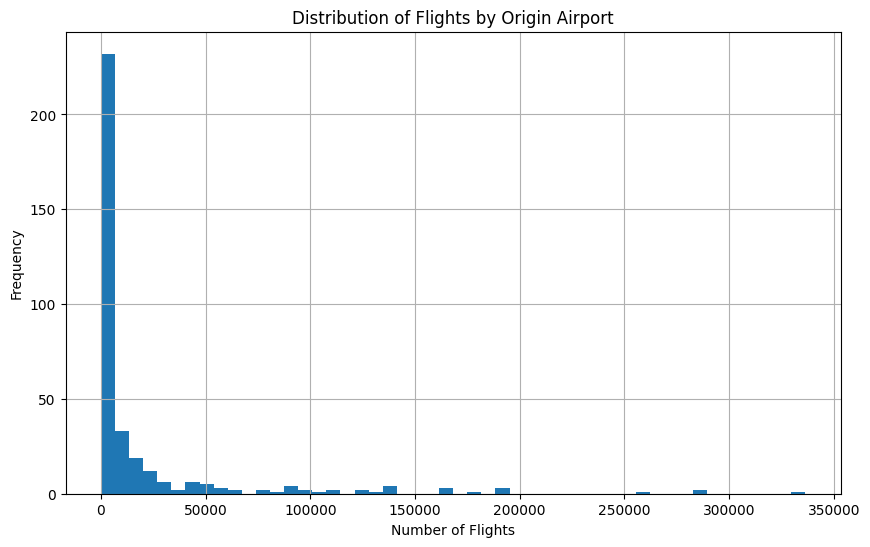

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,DEP_TIME_CAT,DEP_MIN,DELAY_BIN,ORIGIN_POP,DEST_POP,ORIGIN_CAT,DEST_CAT
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,0.0,0.0,2023-01-01,MORNING,310,1,1892,122009,1,3
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,NaN,NaN,2023-01-01,MORNING,330,0,21209,126059,2,3
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,NaN,NaN,2023-01-01,MORNING,540,0,336463,7456,5,2
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,NaN,NaN,2023-01-01,MORNING,663,0,7457,336458,2,5
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,NaN,NaN,2023-01-01,MORNING,390,0,7057,122009,2,3


In [16]:
# Add ORIGIN_CAT & DEST_CAT to identify if the origin / destination airport is
# 1 -> Very-Low Activity
# 2 -> Low Activity
# 3 -> Moderate Activity
# 4 -> High Activity
# 5 -> Very-High Activity

origin_flights = df['ORIGIN'].value_counts()
dest_flights = df['DEST'].value_counts()

fig = plt.figure(figsize=(10, 6))
plt.hist(origin_flights, bins=50)
plt.title('Distribution of Flights by Origin Airport')
plt.xlabel('Number of Flights')
plt.ylabel('Frequency')
plt.grid()
plt.show()

def categorize_activity(num_flights):
    if num_flights <= 350000 / 50:
        return 1  # Very-Low Activity
    elif num_flights <= 70000:
        return 2  # Low Activity
    elif num_flights <= 150000:
        return 3  # Moderate Activity
    elif num_flights <= 250000:
        return 4  # High Activity
    else:
        return 5  # Very-High Activity

df['ORIGIN_CAT'] = df['ORIGIN'].map(origin_flights.apply(categorize_activity))
df['DEST_CAT'] = df['DEST'].map(dest_flights.apply(categorize_activity))

df.head()

In [17]:
# Add a column DAY which takes the count of the day since JAN 1

days_in_month = np.array([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])

# Calculate the day count using vectorized operations
df['DAY'] = days_in_month[df['MONTH'] - 1] + df['DAY_OF_MONTH']

df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,LATE_AIRCRAFT_DELAY,DATE,DEP_TIME_CAT,DEP_MIN,DELAY_BIN,ORIGIN_POP,DEST_POP,ORIGIN_CAT,DEST_CAT,DAY
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,0.0,2023-01-01,MORNING,310,1,1892,122009,1,3,1
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,NaN,2023-01-01,MORNING,330,0,21209,126059,2,3,1
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,NaN,2023-01-01,MORNING,540,0,336463,7456,5,2,1
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,NaN,2023-01-01,MORNING,663,0,7457,336458,2,5,1
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,NaN,2023-01-01,MORNING,390,0,7057,122009,2,3,1


In [18]:
# Add columns ORIGIN_PERF and DEST_PERF which classify airports from 1 (poor) to 6 (excellent) based on delays
df['ORIGIN_PERF'] = df.groupby('ORIGIN')['DELAY_BIN'].transform('sum')
df['DEST_PERF'] = df.groupby('DEST')['DELAY_BIN'].transform('sum')

df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_TIME_CAT,DEP_MIN,DELAY_BIN,ORIGIN_POP,DEST_POP,ORIGIN_CAT,DEST_CAT,DAY,ORIGIN_PERF,DEST_PERF
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,MORNING,310,1,1892,122009,1,3,1,275,17847
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,MORNING,330,0,21209,126059,2,3,1,3856,20412
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,MORNING,540,0,336463,7456,5,2,1,64792,1147
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,MORNING,663,0,7457,336458,2,5,1,1017,55599
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,MORNING,390,0,7057,122009,2,3,1,1227,17847


In [19]:
# Categorize Delay

delay_bins = [0, 15, 30, 60, 120, (max(df['ARR_DELAY_NEW']) + 1)]
delay_labels = ['< 15', '15-30', '30-60', '60-120', '> 120']
df['DEL_CAT'] = pd.cut(df['ARR_DELAY_NEW'], bins=delay_bins, labels=delay_labels, right=False)
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_MIN,DELAY_BIN,ORIGIN_POP,DEST_POP,ORIGIN_CAT,DEST_CAT,DAY,ORIGIN_PERF,DEST_PERF,DEL_CAT
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,310,1,1892,122009,1,3,1,275,17847,15-30
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,330,0,21209,126059,2,3,1,3856,20412,< 15
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,540,0,336463,7456,5,2,1,64792,1147,< 15
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,663,0,7457,336458,2,5,1,1017,55599,< 15
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,390,0,7057,122009,2,3,1,1227,17847,< 15


In [20]:
# Add Route column
df['ROUTE'] = df['ORIGIN'] + '-' + df['DEST']
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DELAY_BIN,ORIGIN_POP,DEST_POP,ORIGIN_CAT,DEST_CAT,DAY,ORIGIN_PERF,DEST_PERF,DEL_CAT,ROUTE
0,2023,1,1,7,9E,4630,11337,DLH,"Duluth, MN",MN,...,1,1892,122009,1,3,1,275,17847,15-30,DLH-MSP
1,2023,1,1,7,9E,4633,13931,ORF,"Norfolk, VA",VA,...,0,21209,126059,2,3,1,3856,20412,< 15,ORF-DTW
2,2023,1,1,7,9E,4639,10397,ATL,"Atlanta, GA",GA,...,0,336463,7456,5,2,1,64792,1147,< 15,ATL-ILM
3,2023,1,1,7,9E,4639,12323,ILM,"Wilmington, NC",NC,...,0,7457,336458,2,5,1,1017,55599,< 15,ILM-ATL
4,2023,1,1,7,9E,4640,11003,CID,"Cedar Rapids/Iowa City, IA",IA,...,0,7057,122009,2,3,1,1227,17847,< 15,CID-MSP


### Exploratory Data Analysis (EDA)

#### Time Analysis

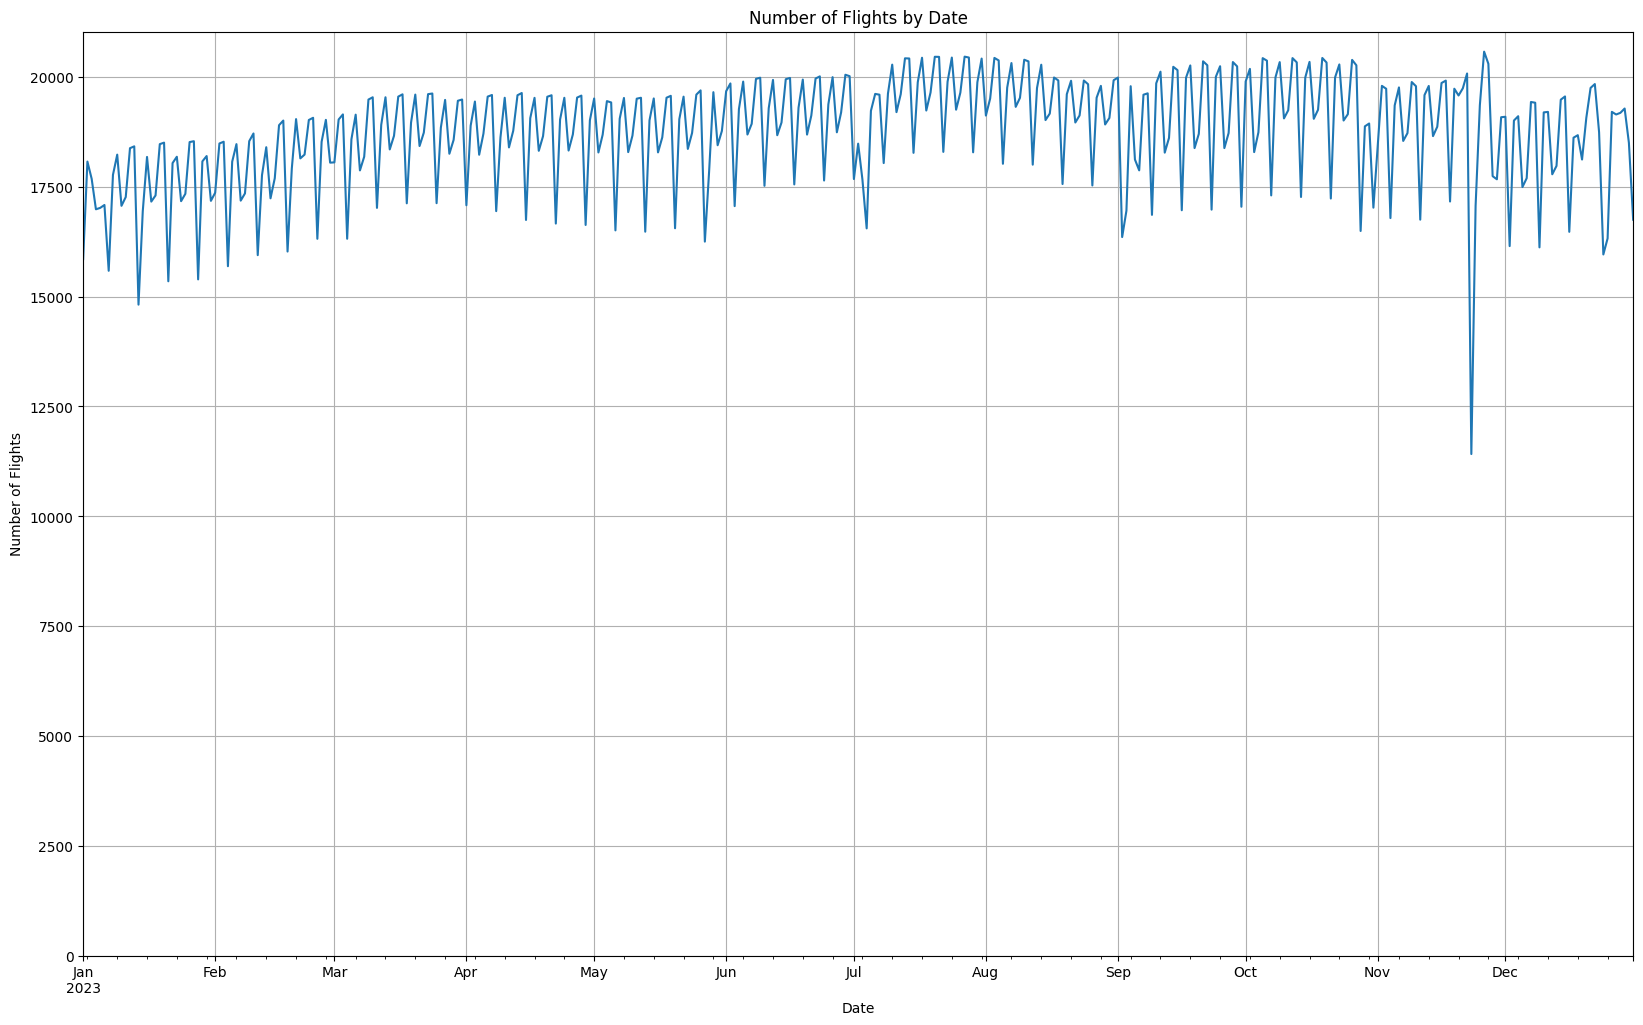

The day with the minimum number of flights has been  2023-11-23  with  11417  flights
The day with the minimum number of flights has been  2023-11-26  with  20578  flights


In [18]:
# Number of Flights Time-Analysis

plt.figure(figsize=(20, 12))
df['DATE'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Flights by Date')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.ylim(0,)
plt.grid()
plt.show();

print('The day with the minimum number of flights has been ', df['DATE'].value_counts().sort_index().idxmin().strftime('%Y-%m-%d'),
      ' with ', min(df['DATE'].value_counts().sort_index()), ' flights')
print('The day with the minimum number of flights has been ', df['DATE'].value_counts().sort_index().idxmax().strftime('%Y-%m-%d'),
      ' with ', max(df['DATE'].value_counts().sort_index()), ' flights')

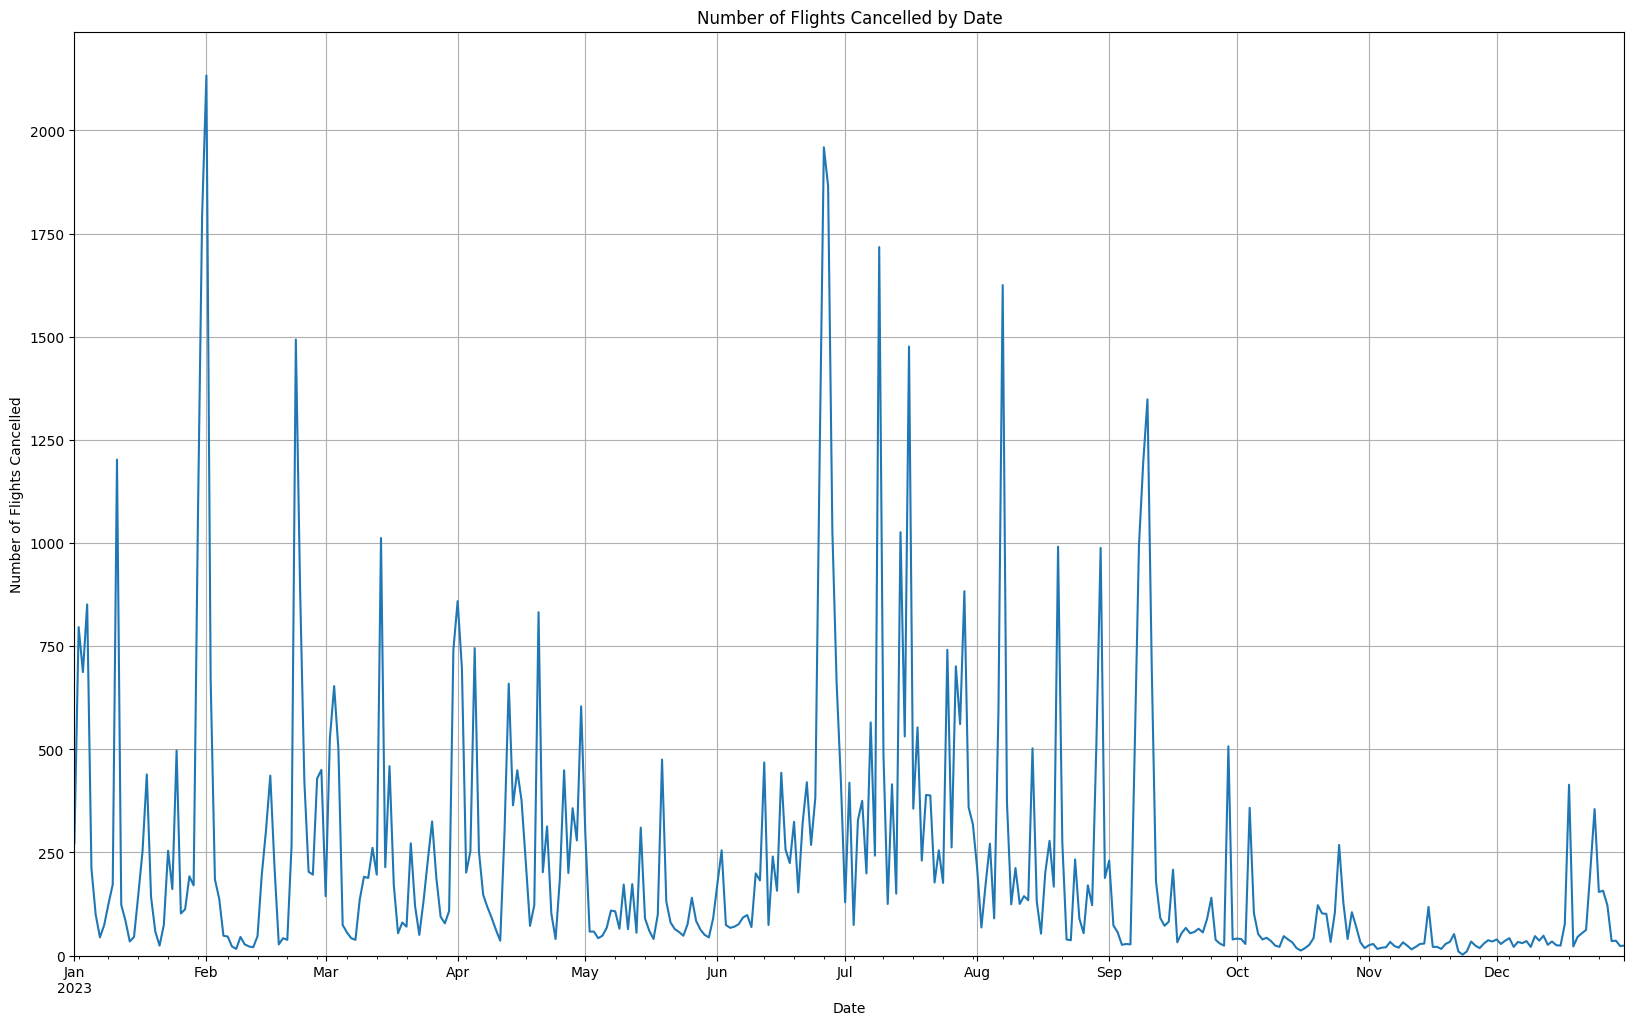

The day with the minimum number of flights cancelled has been  2023-11-23  with  2  flights
The day with the minimum number of flights cancelled has been  2023-02-01  with  2133  flights


In [19]:
# Cancellation Time-Analysis

plt.figure(figsize=(20, 12))
df[df['CANCELLED'] > 0]['DATE'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Flights Cancelled by Date')
plt.xlabel('Date')
plt.ylabel('Number of Flights Cancelled')
plt.ylim(0,)
plt.grid()
plt.show();

print('The day with the minimum number of flights cancelled has been ', df[df['CANCELLED'] > 0]['DATE'].value_counts().sort_index().idxmin().strftime('%Y-%m-%d'),
      ' with ', min(df[df['CANCELLED'] > 0]['DATE'].value_counts().sort_index()), ' flights')
print('The day with the minimum number of flights cancelled has been ', df[df['CANCELLED'] > 0]['DATE'].value_counts().sort_index().idxmax().strftime('%Y-%m-%d'),
      ' with ', max(df[df['CANCELLED'] > 0]['DATE'].value_counts().sort_index()), ' flights')

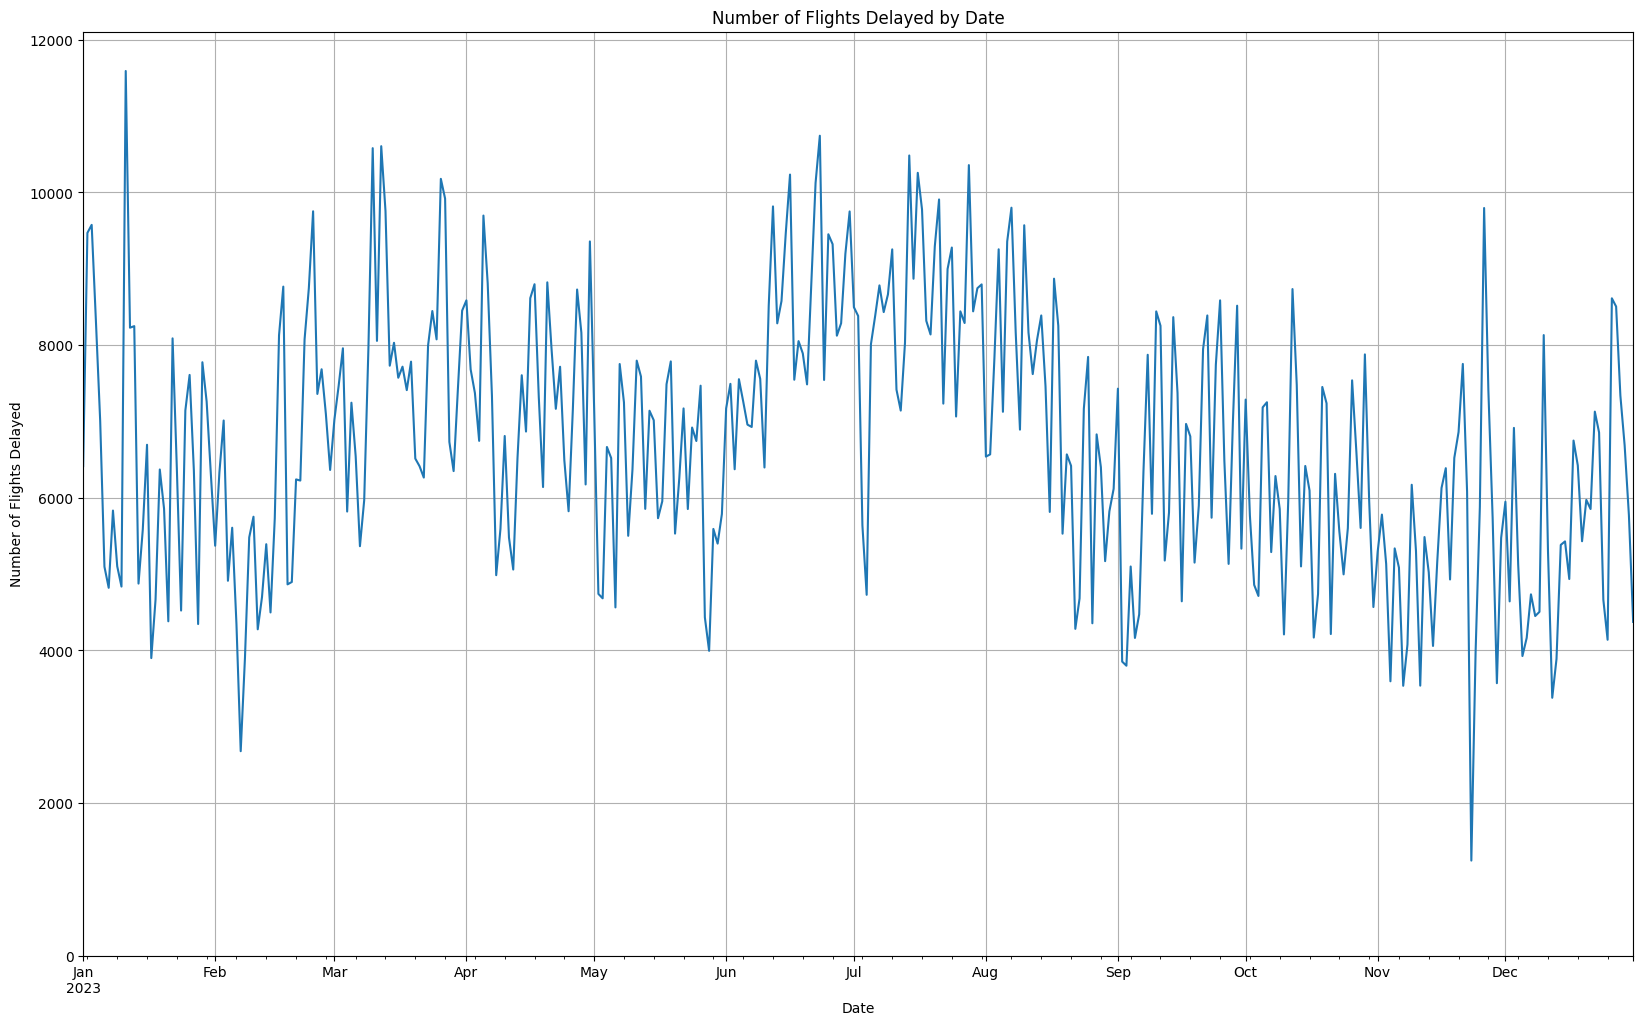

The day with the minimum number of flights delayed has been  2023-11-23  with  1244  flights
The day with the minimum number of flights delayed has been  2023-01-11  with  11589  flights


In [20]:
# Delay Time-Analysis

plt.figure(figsize=(20, 12))
df[df['ARR_DELAY_NEW'] > 0]['DATE'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Flights Delayed by Date')
plt.xlabel('Date')
plt.ylabel('Number of Flights Delayed')
plt.ylim(0,)
plt.grid()
plt.show();

print('The day with the minimum number of flights delayed has been ', df[df['ARR_DELAY_NEW'] > 0]['DATE'].value_counts().sort_index().idxmin().strftime('%Y-%m-%d'),
      ' with ', min(df[df['ARR_DELAY_NEW'] > 0]['DATE'].value_counts().sort_index()), ' flights')
print('The day with the minimum number of flights delayed has been ', df[df['ARR_DELAY_NEW'] > 0]['DATE'].value_counts().sort_index().idxmax().strftime('%Y-%m-%d'),
      ' with ', max(df[df['ARR_DELAY_NEW'] > 0]['DATE'].value_counts().sort_index()), ' flights')

#### Number of Flights Analysis

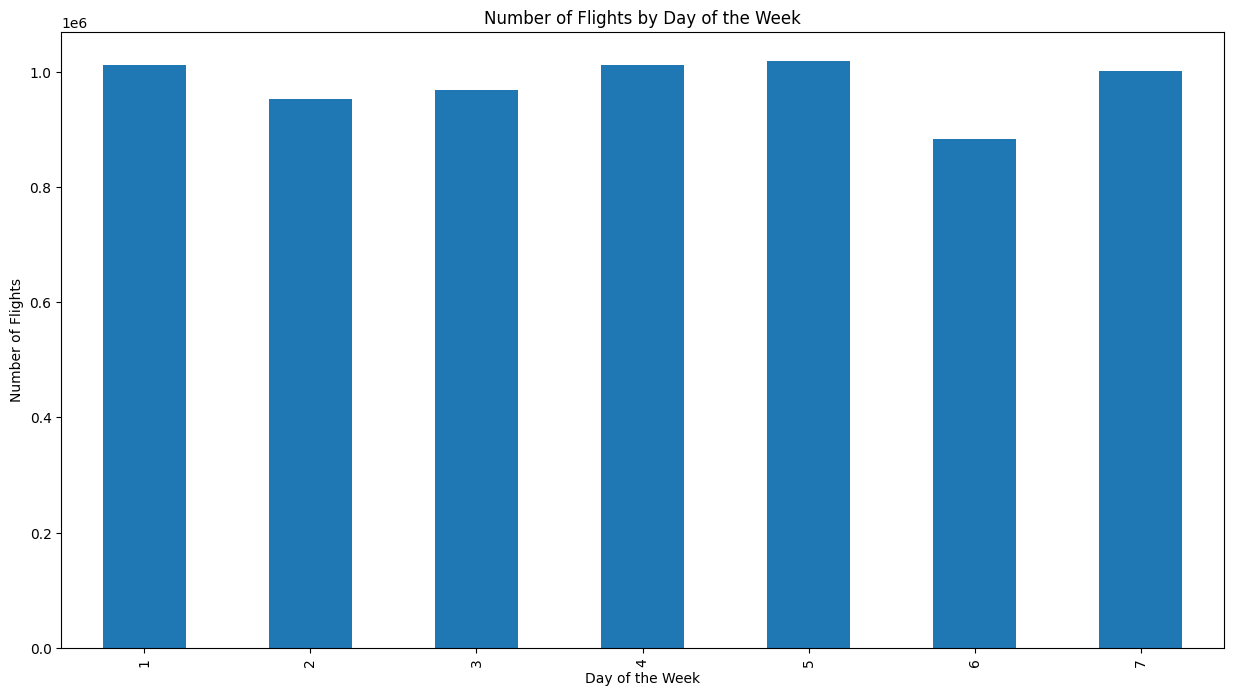

In [21]:
# Number of Flights by Day of the Week

plt.figure(figsize=(15, 8))
df.groupby('DAY_OF_WEEK').size().plot(kind='bar')
plt.title('Number of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.savefig('Number of Flights by Day of the Week.png')
plt.show();

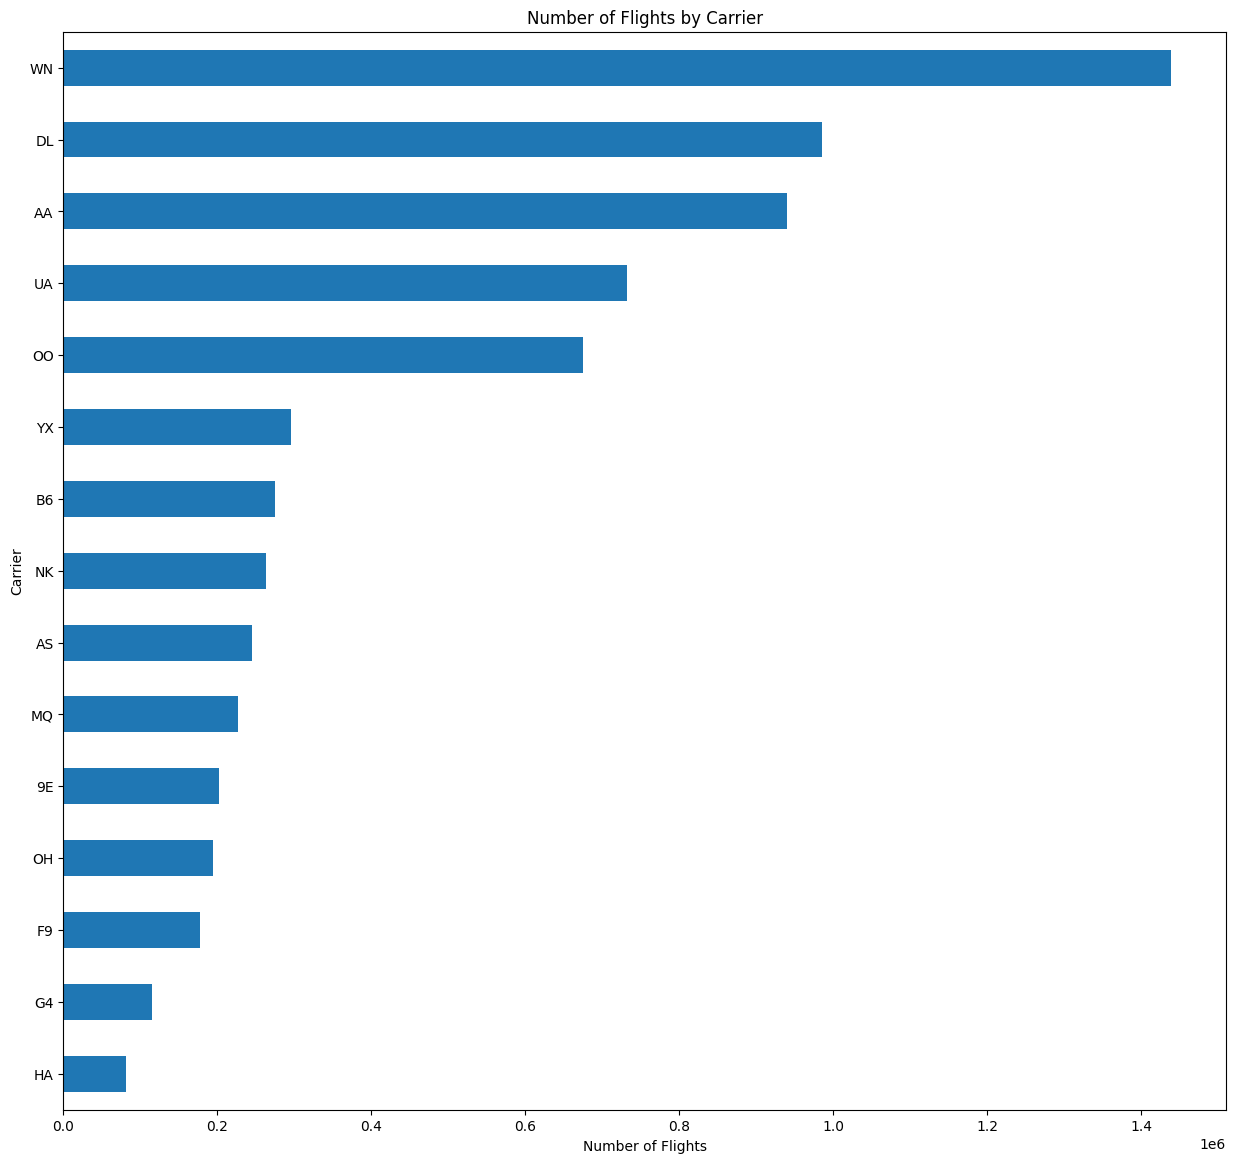

In [22]:
# Number of Flights by Carrier

plt.figure(figsize=(15, 14))
df.groupby('OP_UNIQUE_CARRIER').size().sort_values().plot(kind='barh')
plt.title('Number of Flights by Carrier')
plt.xlabel('Number of Flights')
plt.ylabel('Carrier')
plt.savefig('Number of Flights by Carrier.png')
plt.show();

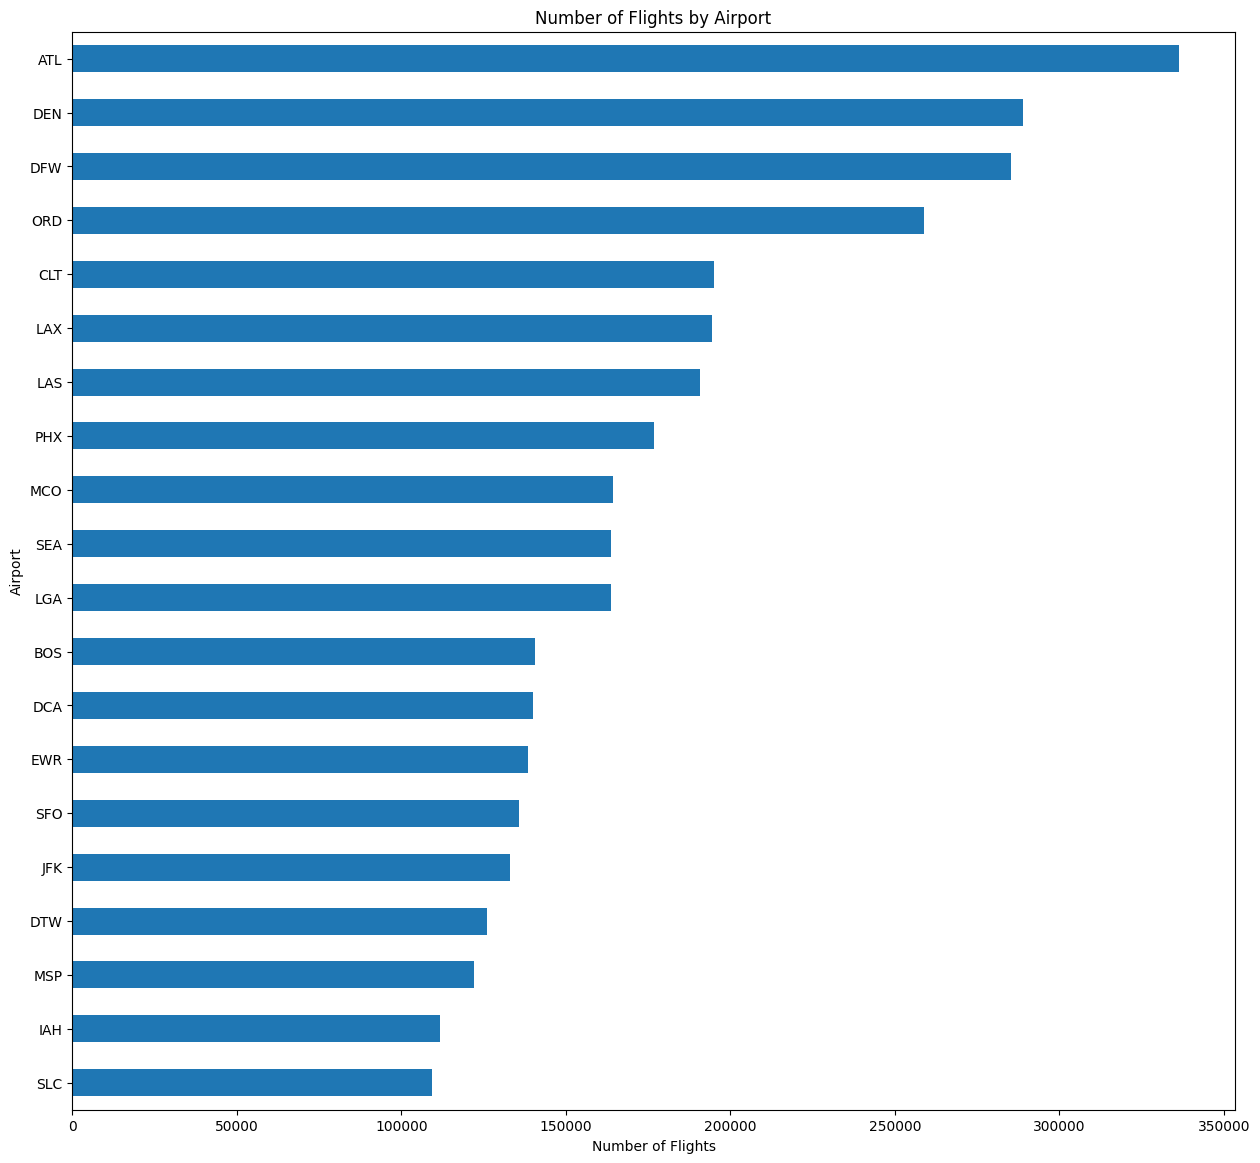

In [23]:
# Number of Flights by Origin Airport (Top 20)

plt.figure(figsize=(15, 14))
df.groupby('ORIGIN').size().sort_values().tail(20).plot(kind='barh')
plt.title('Number of Flights by Airport')
plt.xlabel('Number of Flights')
plt.ylabel('Airport')
plt.savefig('Number of Flights by Airport.png')
plt.show();

#### Air Time Analysis

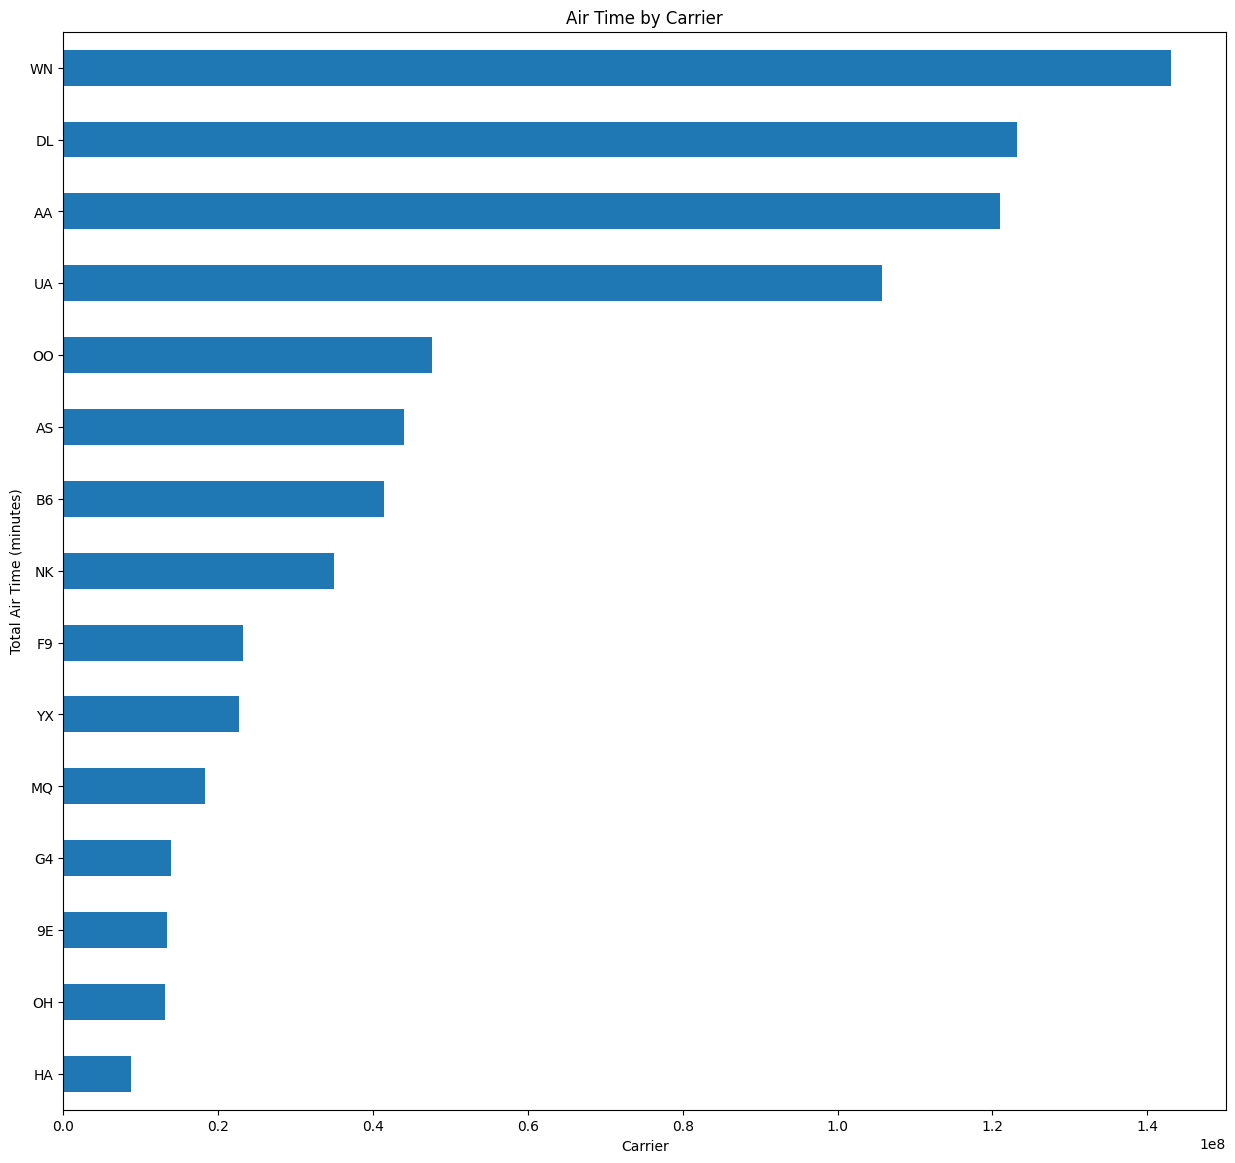

In [24]:
# Total Air Time by Carrier

fig = plt.figure(figsize=(15, 14))
df.groupby('OP_UNIQUE_CARRIER')['AIR_TIME'].sum().sort_values().plot(kind='barh')
plt.title('Air Time by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Total Air Time (minutes)')
plt.show();

#### Cancellation Analysis

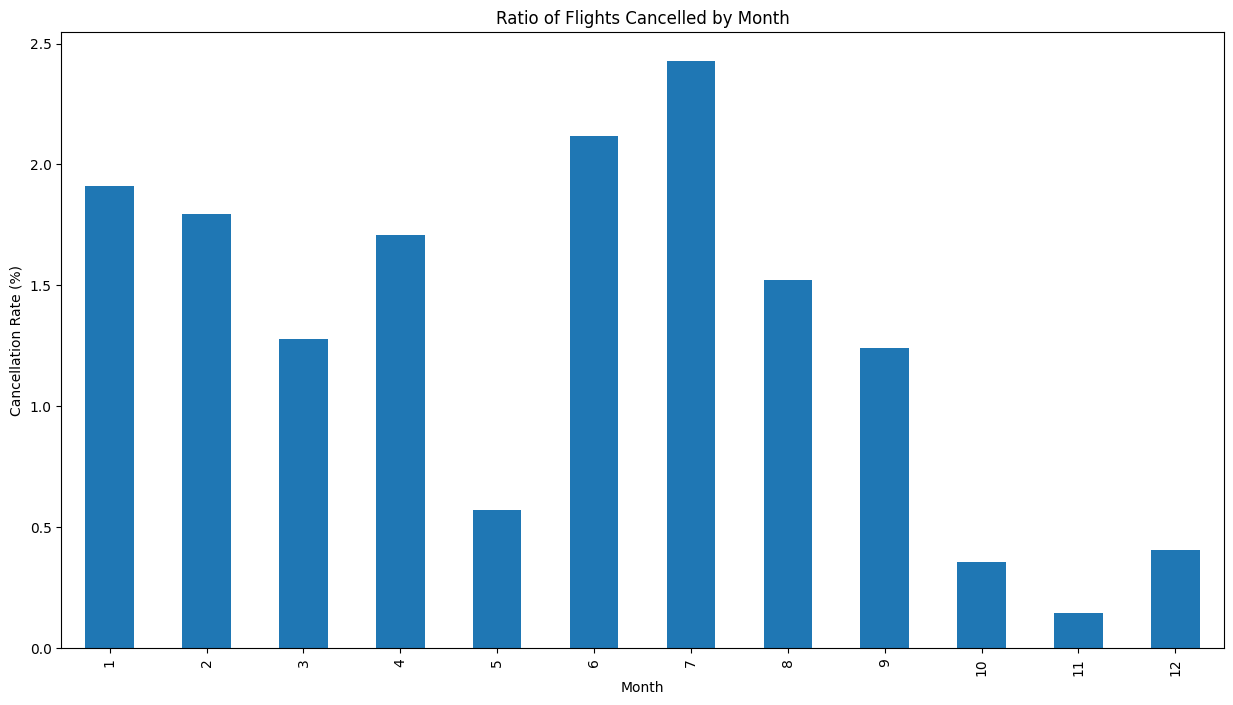

In [24]:
# Ratio of Flights Cancelled by Month

plt.figure(figsize=(15, 8))
((df[df['CANCELLED'] > 0].groupby('MONTH').size() / df.groupby('MONTH').size()) * 100).plot(kind='bar')
plt.title('Ratio of Flights Cancelled by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.savefig('Ratio of Flights Cancelled by Month.png')
plt.show();

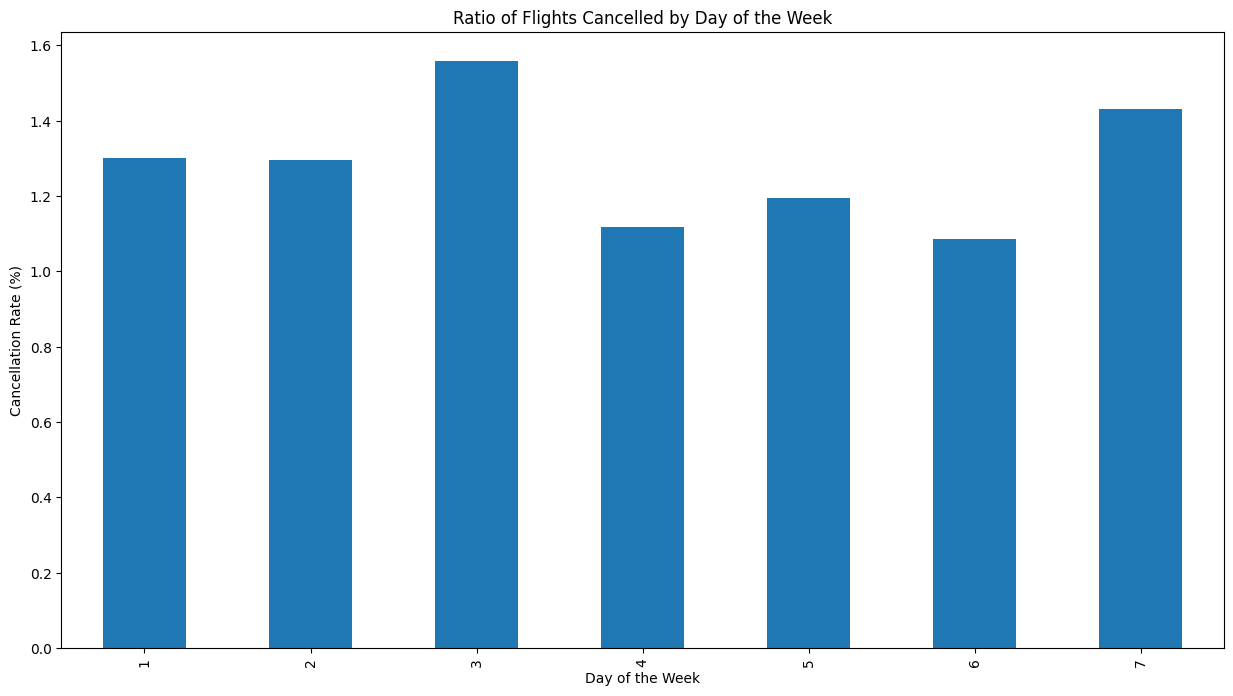

In [25]:
# Number of Flights Cancelled by Day of the Week

plt.figure(figsize=(15, 8))
((df[df['CANCELLED'] > 0].groupby('DAY_OF_WEEK').size() / df.groupby('DAY_OF_WEEK').size()) * 100).plot(kind='bar')
plt.title('Ratio of Flights Cancelled by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate (%)')
plt.savefig('Ratio of Flights Cancelled by Day of the Week.png')
plt.show();

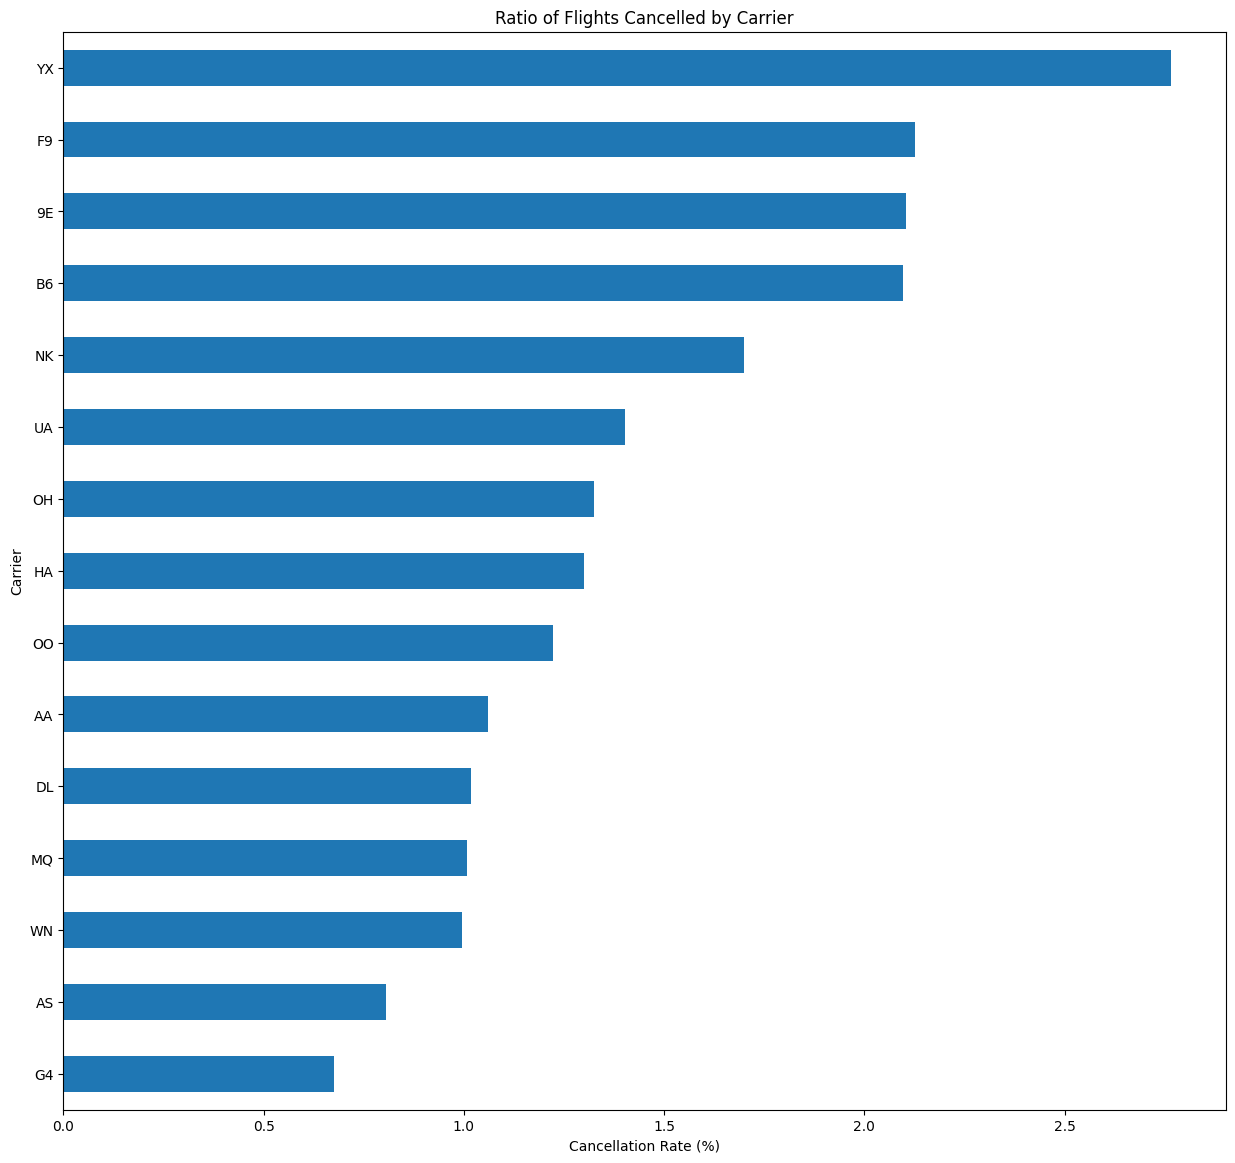

In [27]:
# Ratio of Flights Cancelled by Carrier (Ratio with Total Flights operated by the Carrier)

plt.figure(figsize=(15, 14))
((df[df['CANCELLED'] > 0].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size())*100).sort_values().plot(kind='barh')
plt.title('Ratio of Flights Cancelled by Carrier')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Carrier')
plt.savefig('Ratio of Flights Cancelled by Carrier.png')
plt.show();

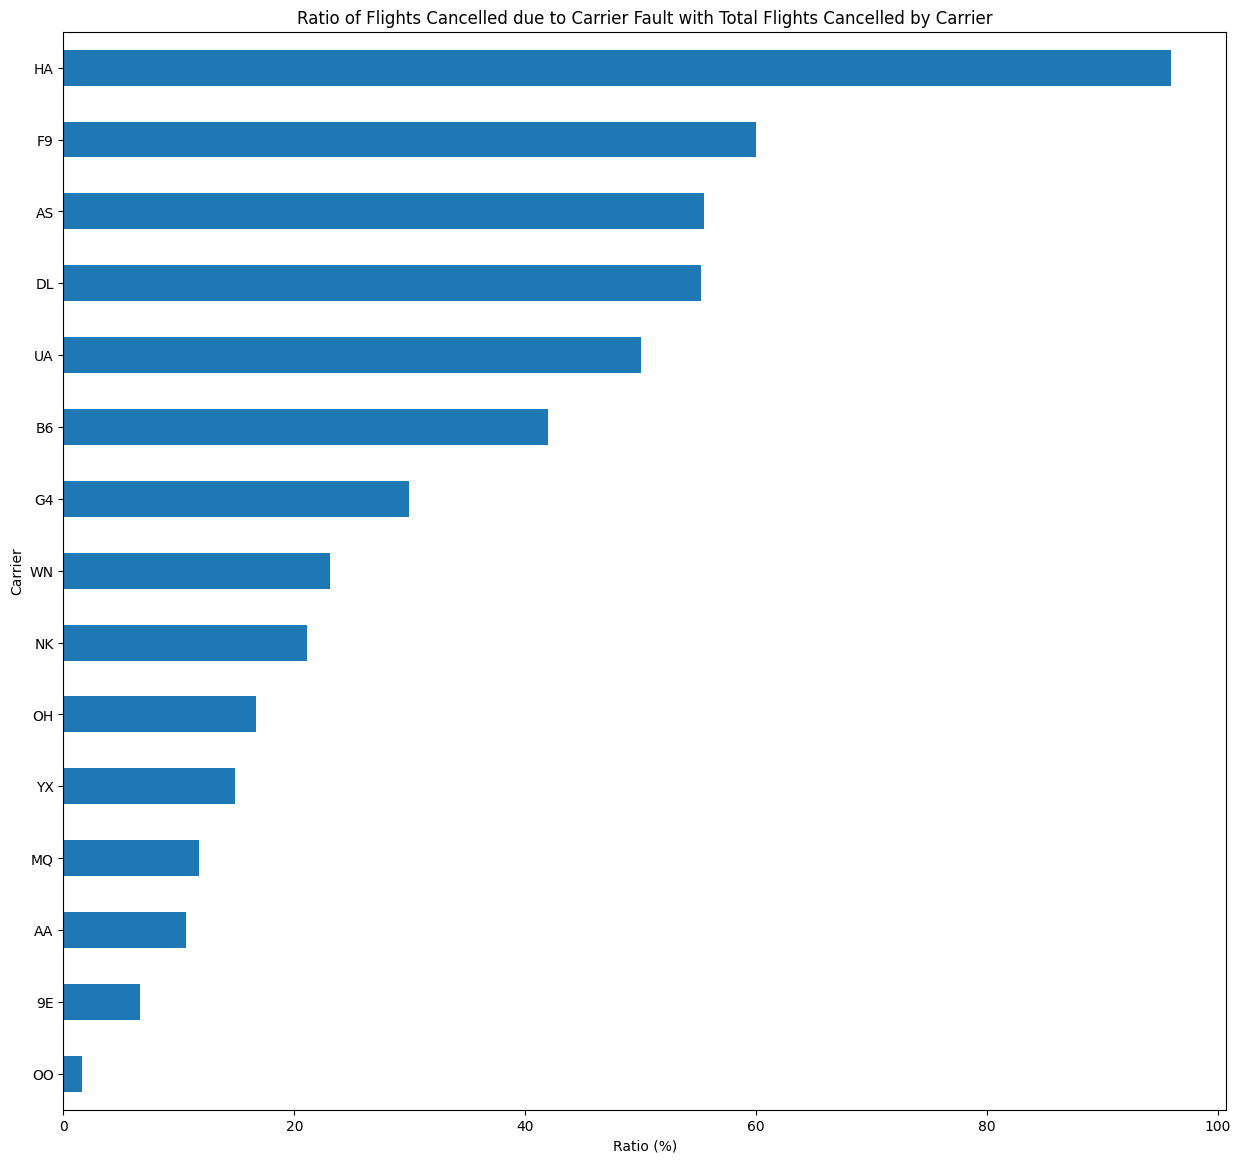

In [33]:
# Carrier Fault Cancellation Analysis (Ratio with Total Flights Cancelled not operated by the Carrier)

plt.figure(figsize=(15, 14))
((df[(df['CANCELLED'] > 0) & (df['CANCELLATION_CODE'] == 'Carrier')].groupby('OP_UNIQUE_CARRIER').size()) / (df[df['CANCELLED'] > 0].groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='barh')
plt.title('Ratio of Flights Cancelled due to Carrier Fault with Total Flights Cancelled by Carrier')
plt.xlabel('Ratio (%)')
plt.ylabel('Carrier')
plt.show();

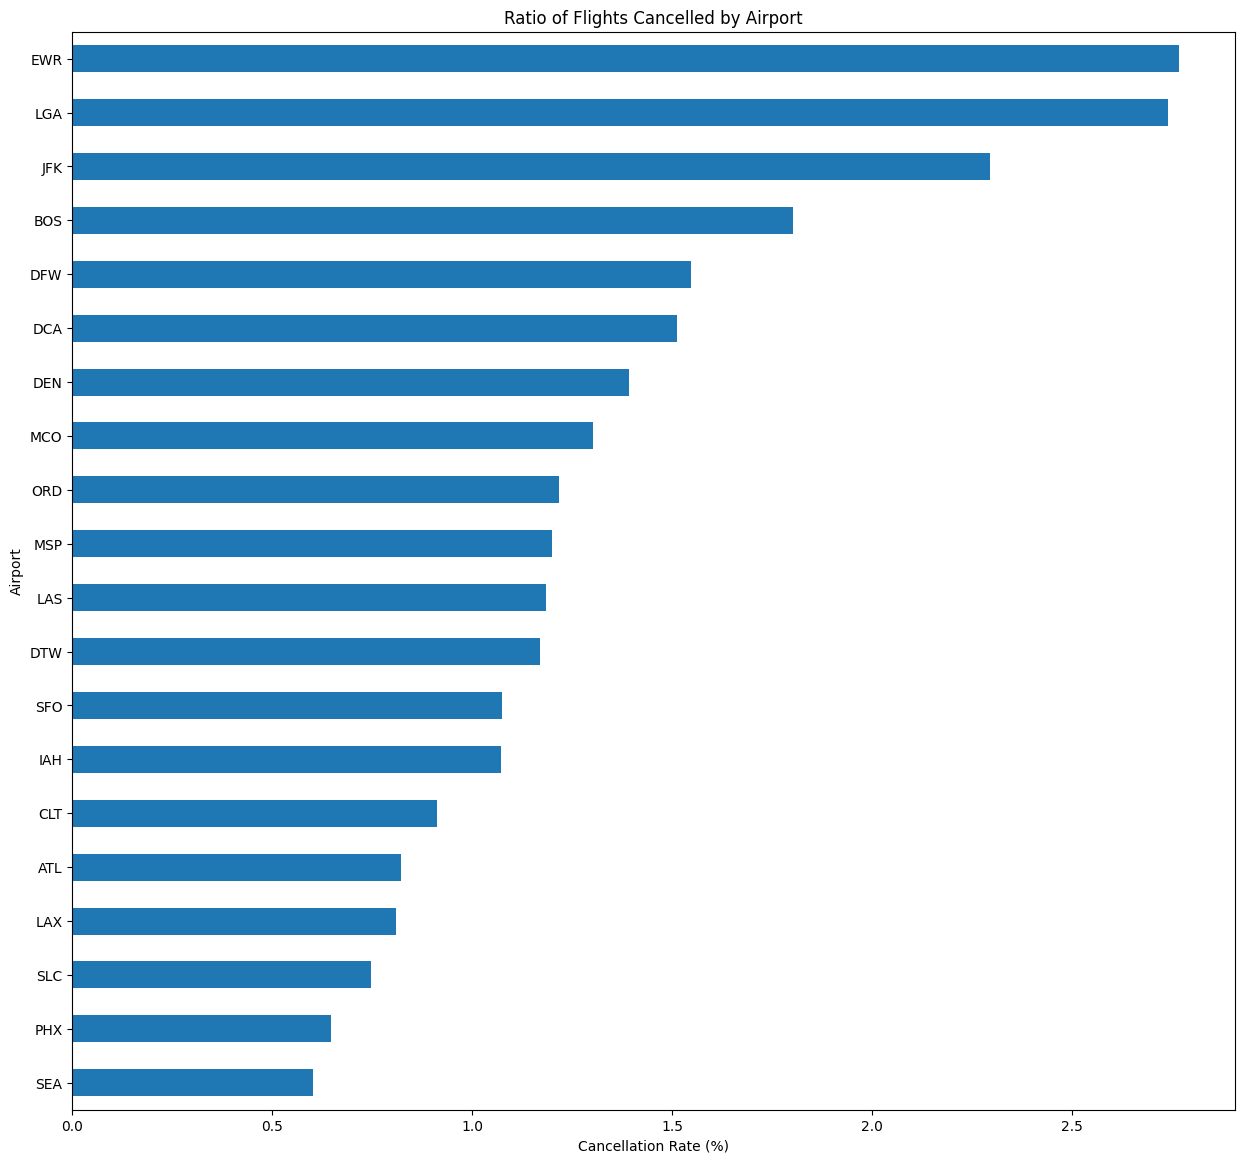

In [34]:
# Ratio of Flights Cancelled by Origin Airport

plt.figure(figsize=(15, 14))
((df[df['CANCELLED'] > 0].groupby('ORIGIN').size() / df.groupby('ORIGIN').size()) * 100)[df['ORIGIN'].value_counts().nlargest(20).index].sort_values().plot(kind='barh')
plt.title('Ratio of Flights Cancelled by Airport')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Airport')
plt.show();

#### Delay Analysis

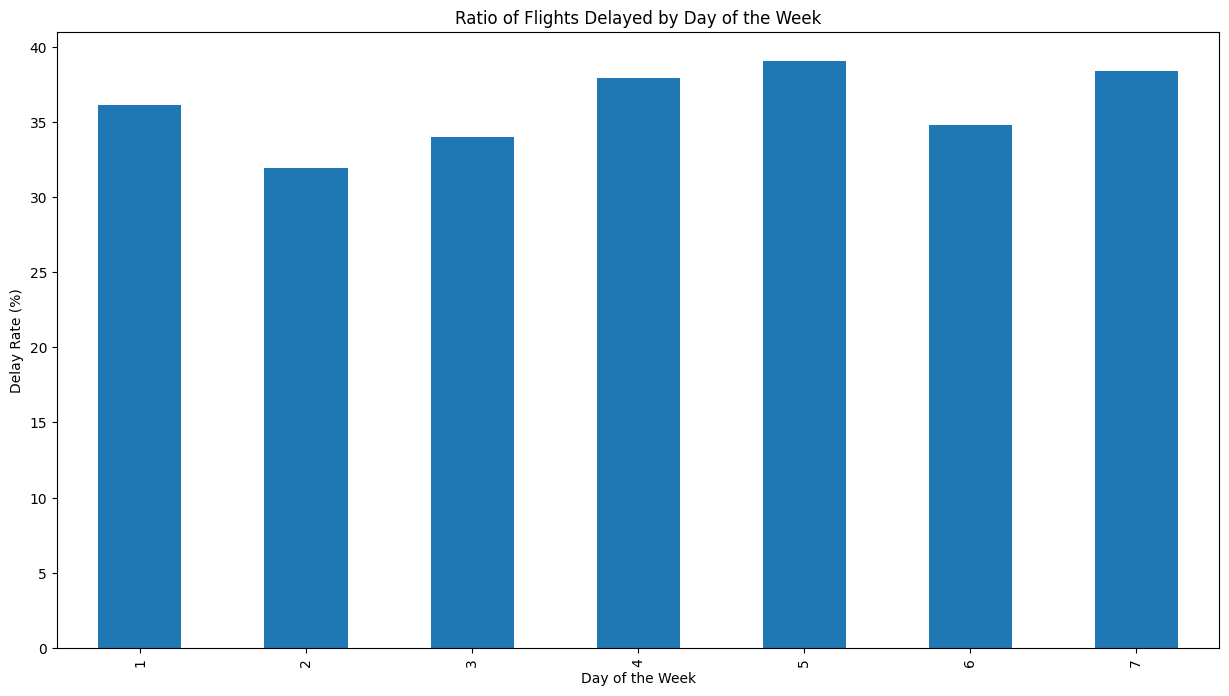

In [35]:
# Number of Flights Delayed by Day of the Week

plt.figure(figsize=(15, 8))
((df[df['ARR_DELAY_NEW'] > 0].groupby('DAY_OF_WEEK').size() / df.groupby('DAY_OF_WEEK').size()) * 100).plot(kind='bar')
plt.title('Ratio of Flights Delayed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay Rate (%)')
plt.show();

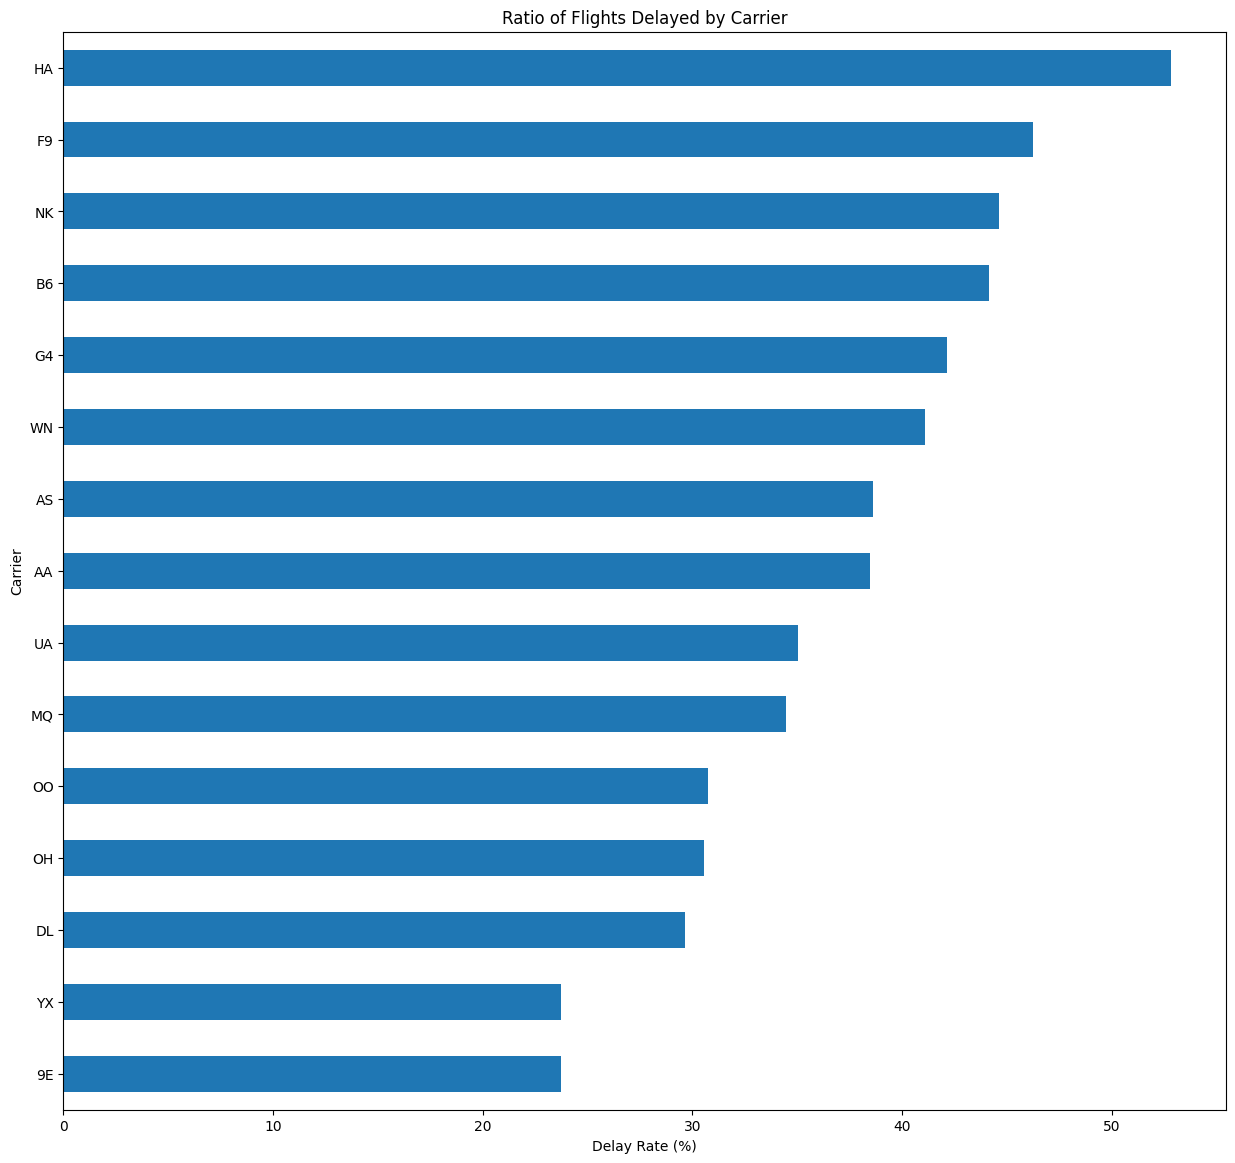

In [36]:
# Ratio of Flights Delayed by Carrier

plt.figure(figsize=(15, 14))
((df[df['ARR_DELAY_NEW'] > 0].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size())*100).sort_values().plot(kind='barh')
plt.title('Ratio of Flights Delayed by Carrier')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Carrier')
plt.show();

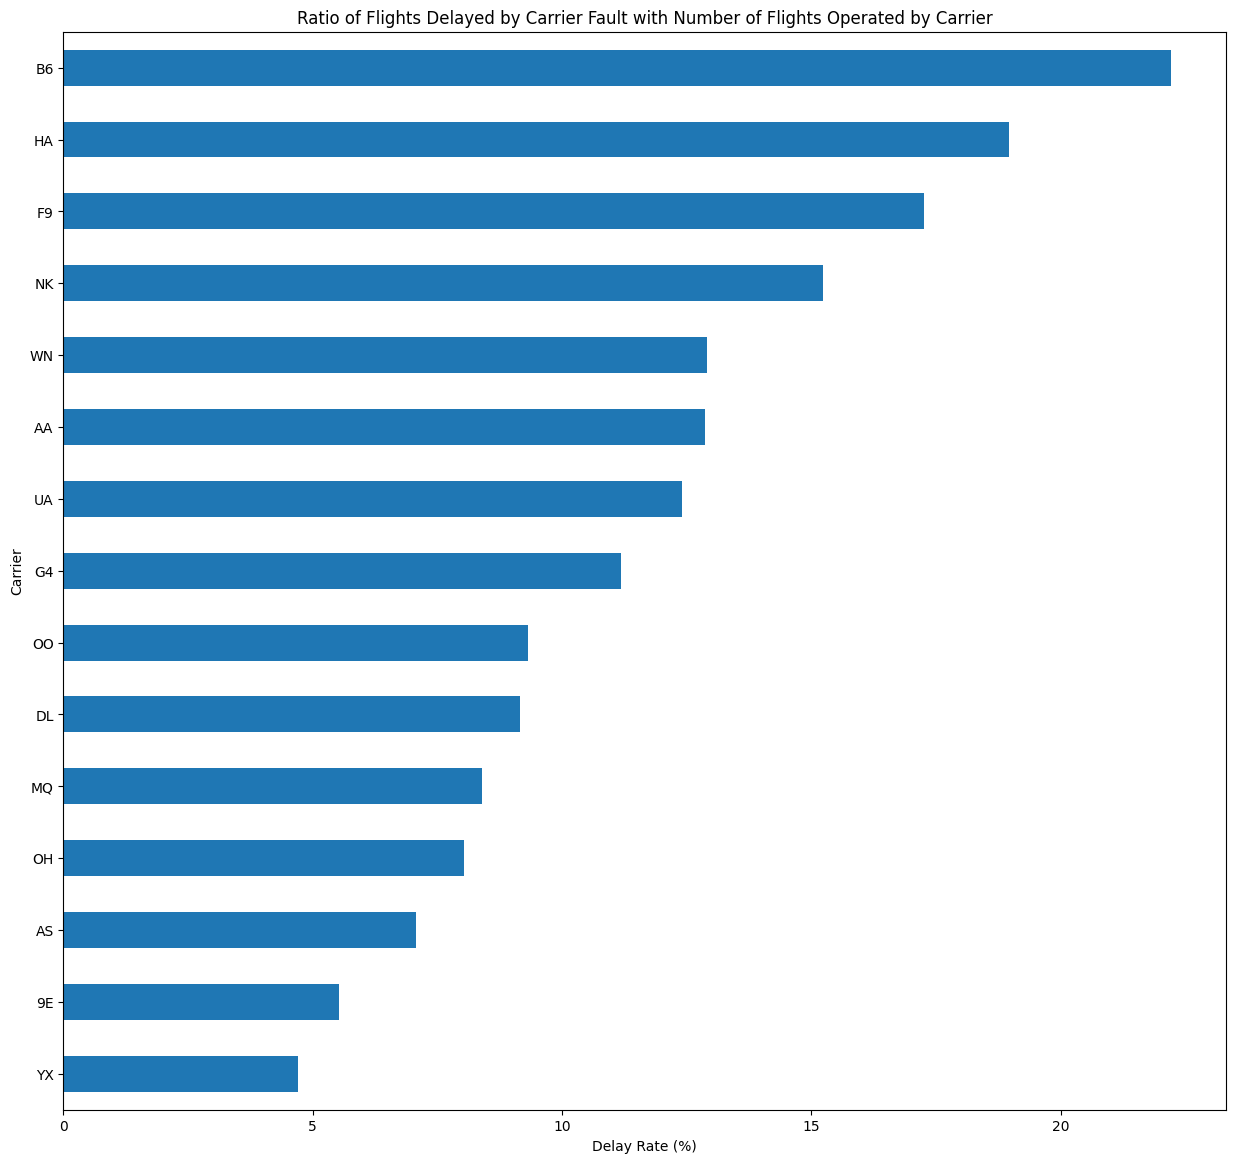

In [37]:
# Carrier Fault Delay Analysis (Ratio with Total Flights operated by the Carrier)

plt.figure(figsize=(15, 14))
((df[df['CARRIER_DELAY'] > 0].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size())*100).sort_values().plot(kind='barh')
plt.title('Ratio of Flights Delayed by Carrier Fault with Number of Flights Operated by Carrier')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Carrier')
plt.show();

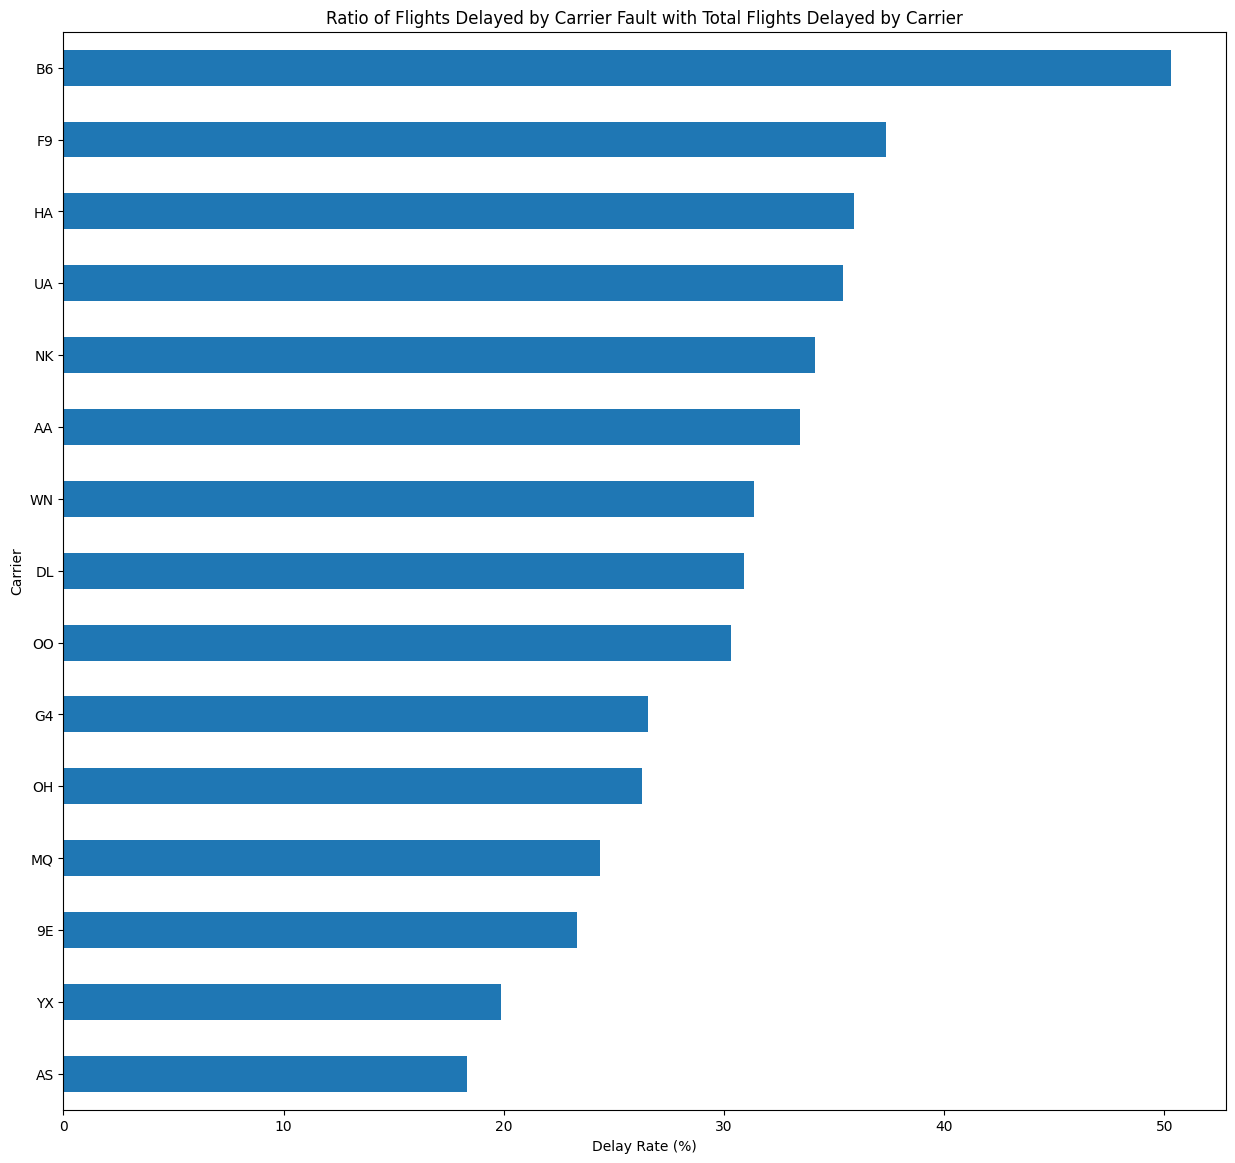

In [38]:
# Carrier Fault Delay Analysis (Ratio with Total Flights Delayed operated by the Carrier)

plt.figure(figsize=(15, 14))
((df[df['CARRIER_DELAY'] > 0].groupby('OP_UNIQUE_CARRIER').size() / df[df['ARR_DELAY_NEW'] > 0].groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='barh')
plt.title('Ratio of Flights Delayed by Carrier Fault with Total Flights Delayed by Carrier')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Carrier')
plt.show();

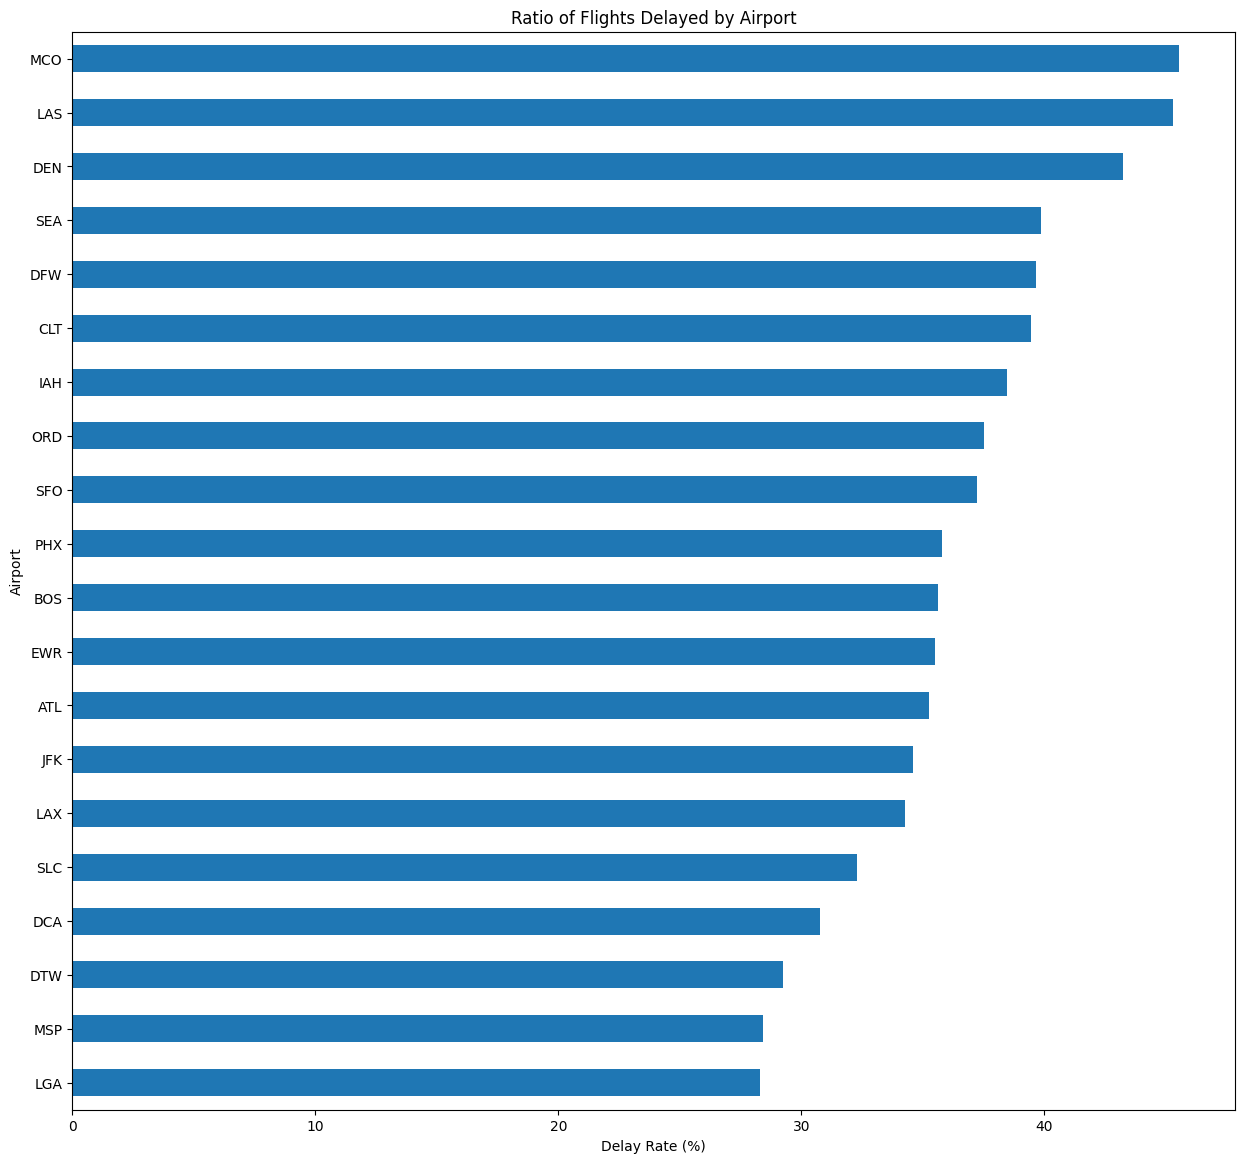

In [39]:
# Ratio of Flights Delayed by Origin Airport

plt.figure(figsize=(15, 14))
((df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size() / df.groupby('ORIGIN').size()) * 100)[df['ORIGIN'].value_counts().nlargest(20).index].sort_values().plot(kind='barh')
plt.title('Ratio of Flights Delayed by Airport')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Airport')
plt.show();

#### Other Visualizations

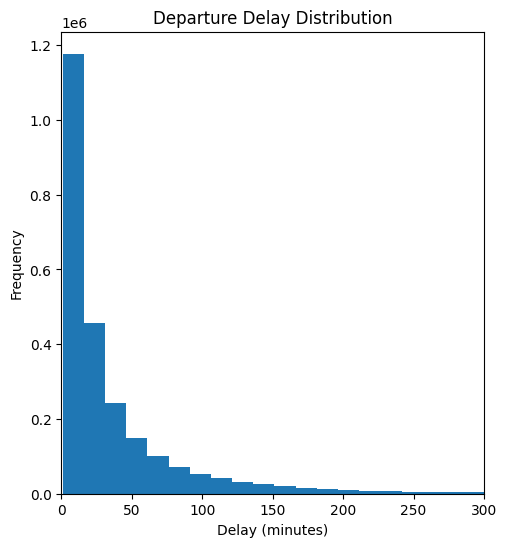

In [40]:
# Distribution of flight delays

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
num_bins = int((df['ARR_DELAY_NEW'].max() - df['ARR_DELAY_NEW'].min()) / 15)
plt.hist(df[df['ARR_DELAY_NEW'] > 0]['ARR_DELAY_NEW'], bins=num_bins)
plt.title('Departure Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.xlim(0,300)
plt.ylabel('Frequency')
plt.show();

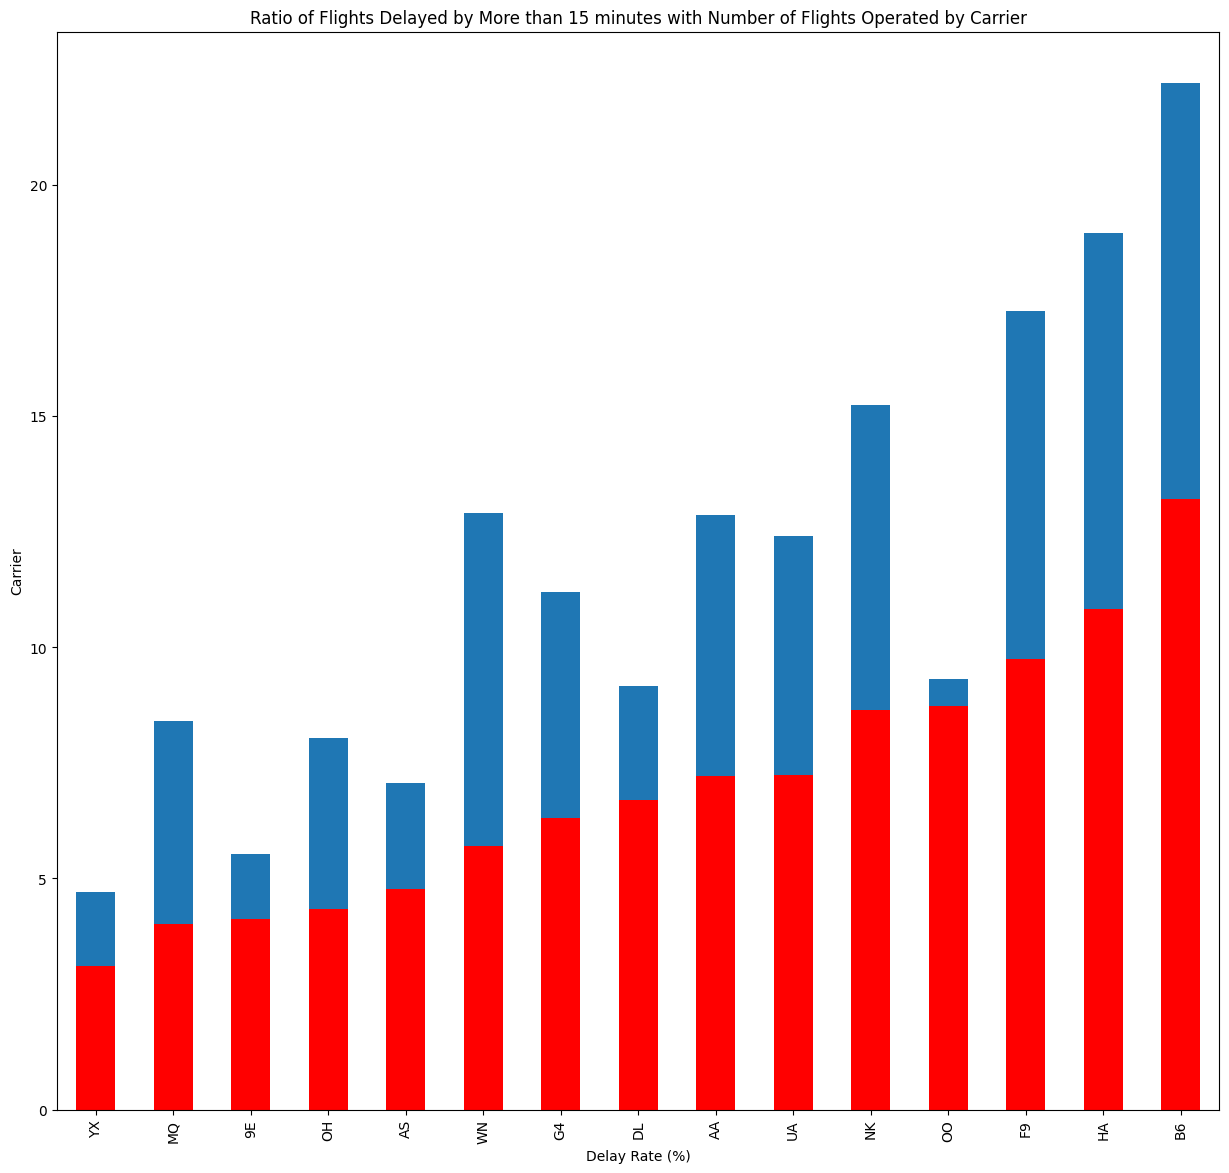

In [43]:
# Airline Efficiency: comparison b/w flights delayed by Carrier and flights delayed more than 15 minutes by Carrier

plt.figure(figsize=(15, 14))
((df[df['CARRIER_DELAY'] > 0].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size())*100)[((df[df['CARRIER_DELAY'] > 15].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().index].plot(kind='bar')
((df[df['CARRIER_DELAY'] > 15].groupby('OP_UNIQUE_CARRIER').size() / df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='bar', color='red', label='Delayed more than 15 mins by Carrier')
plt.title('Ratio of Flights Delayed by More than 15 minutes with Number of Flights Operated by Carrier')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Carrier')
plt.savefig('Ratio of Flights Delayed by More than 15 minutes with Number of Flights Operated by Carrier.png')
plt.show();

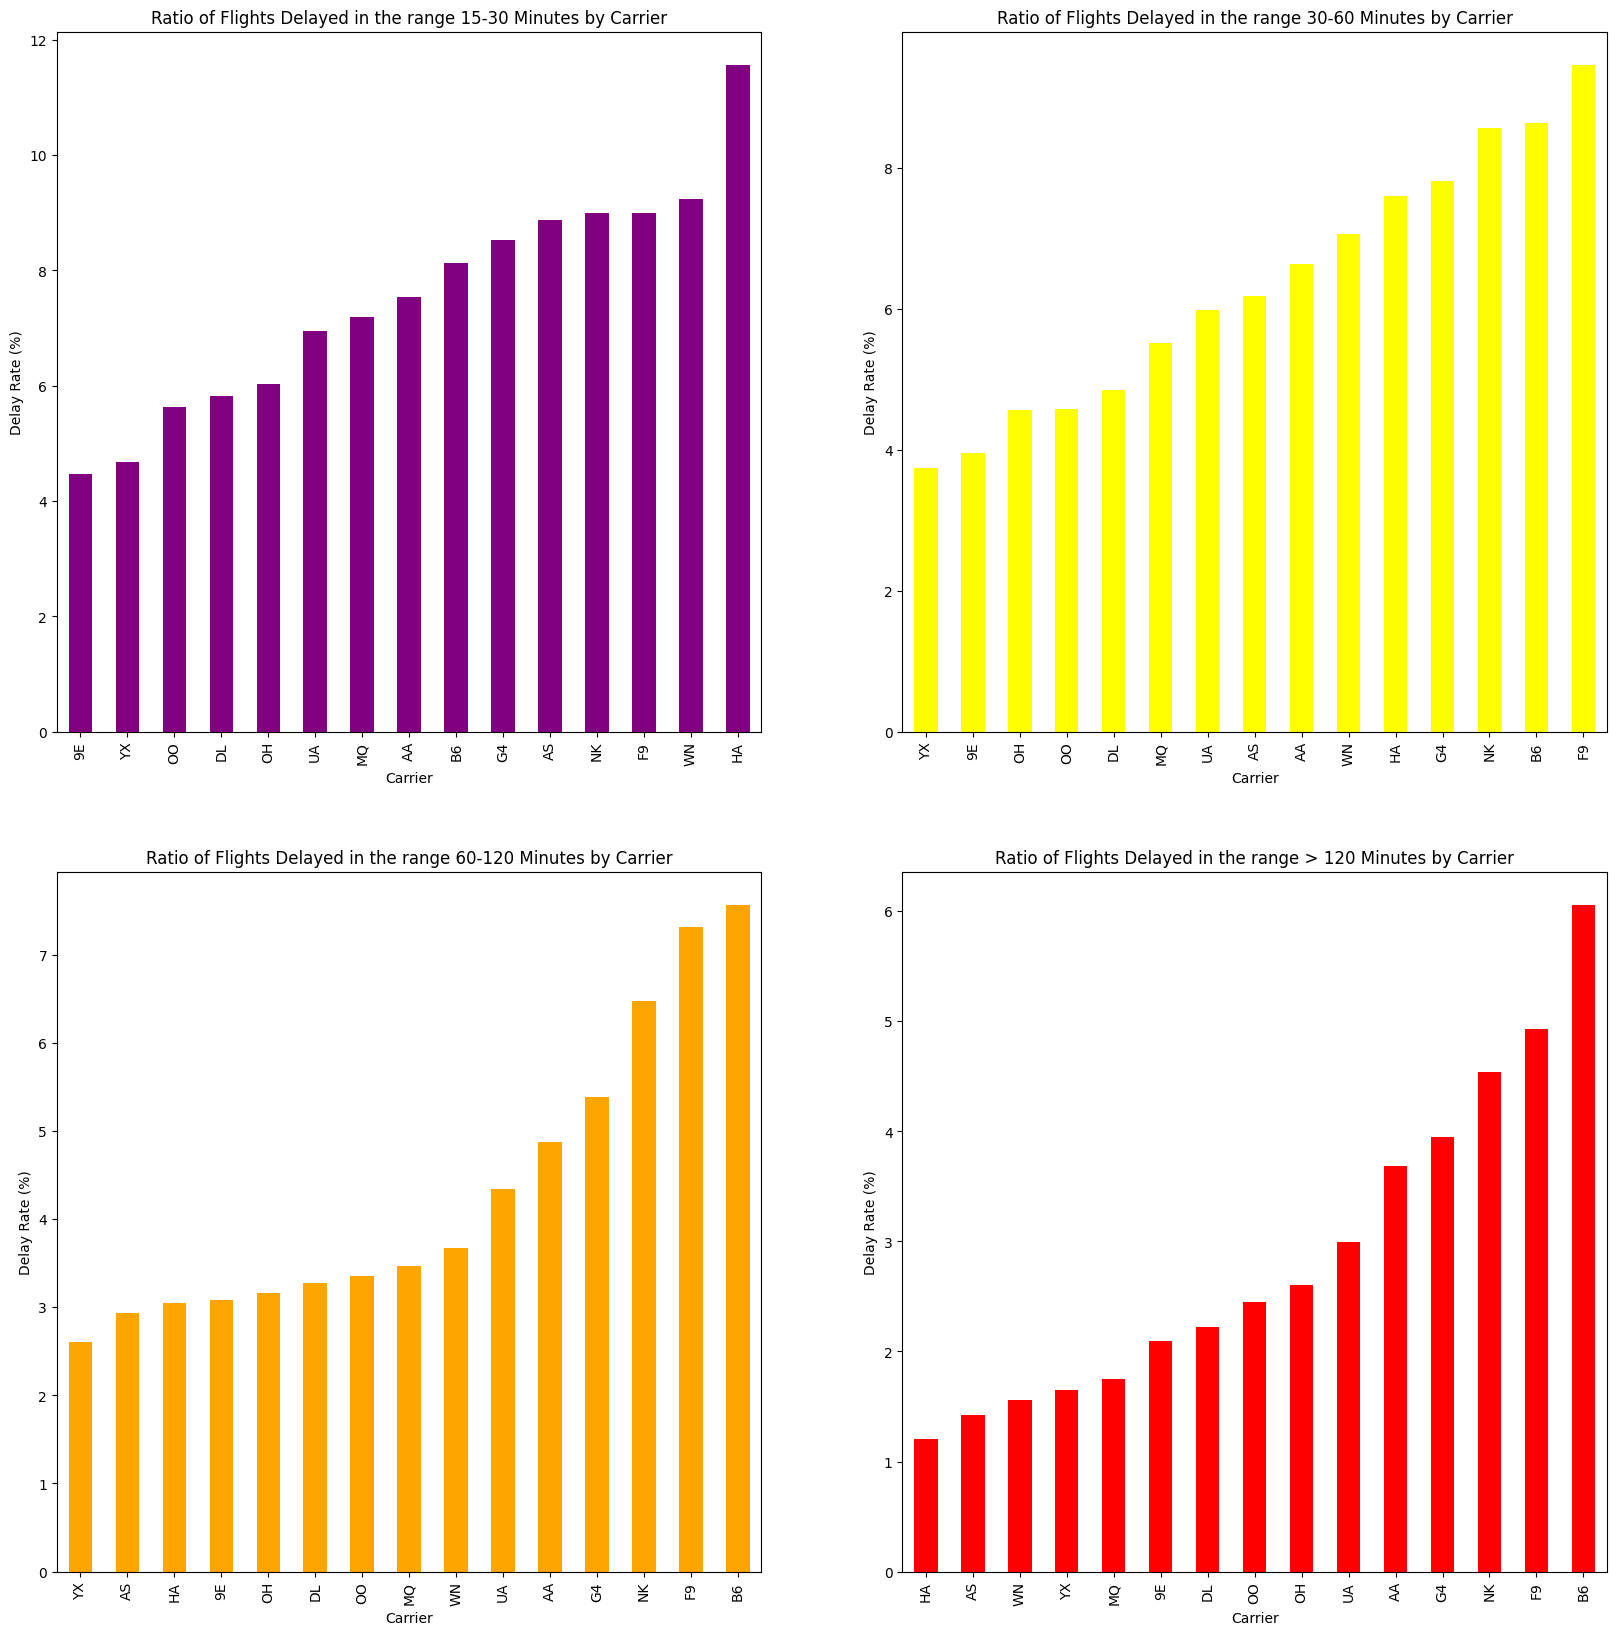

In [45]:
# Comparison of Carrier Performances by Delay Category

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2) #creates a figure with 2 rows and 2 columns
#Create the subplots
plt1 = plt.subplot(gs[0, 0])
plt2 = plt.subplot(gs[0, 1])
plt3 = plt.subplot(gs[1, 0])
plt4 = plt.subplot(gs[1, 1])

((df[df['DEL_CAT'] == '15-30'].groupby('OP_UNIQUE_CARRIER').size()) / (df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='bar', color='purple', ax=plt1)
plt1.set_title('Ratio of Flights Delayed in the range 15-30 Minutes by Carrier')
plt1.set_xlabel('Carrier')
plt1.set_ylabel('Delay Rate (%)')

((df[df['DEL_CAT'] == '30-60'].groupby('OP_UNIQUE_CARRIER').size()) / (df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='bar', color='yellow', ax=plt2)
plt2.set_title('Ratio of Flights Delayed in the range 30-60 Minutes by Carrier')
plt2.set_xlabel('Carrier')
plt2.set_ylabel('Delay Rate (%)')

((df[df['DEL_CAT'] == '60-120'].groupby('OP_UNIQUE_CARRIER').size()) / (df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='bar', color='orange', ax=plt3)
plt3.set_title('Ratio of Flights Delayed in the range 60-120 Minutes by Carrier')
plt3.set_xlabel('Carrier')
plt3.set_ylabel('Delay Rate (%)')

((df[df['DEL_CAT'] == '> 120'].groupby('OP_UNIQUE_CARRIER').size()) / (df.groupby('OP_UNIQUE_CARRIER').size()) * 100).sort_values().plot(kind='bar', color='red', ax=plt4)
plt4.set_title('Ratio of Flights Delayed in the range > 120 Minutes by Carrier')
plt4.set_xlabel('Carrier')
plt4.set_ylabel('Delay Rate (%)')

plt.show();

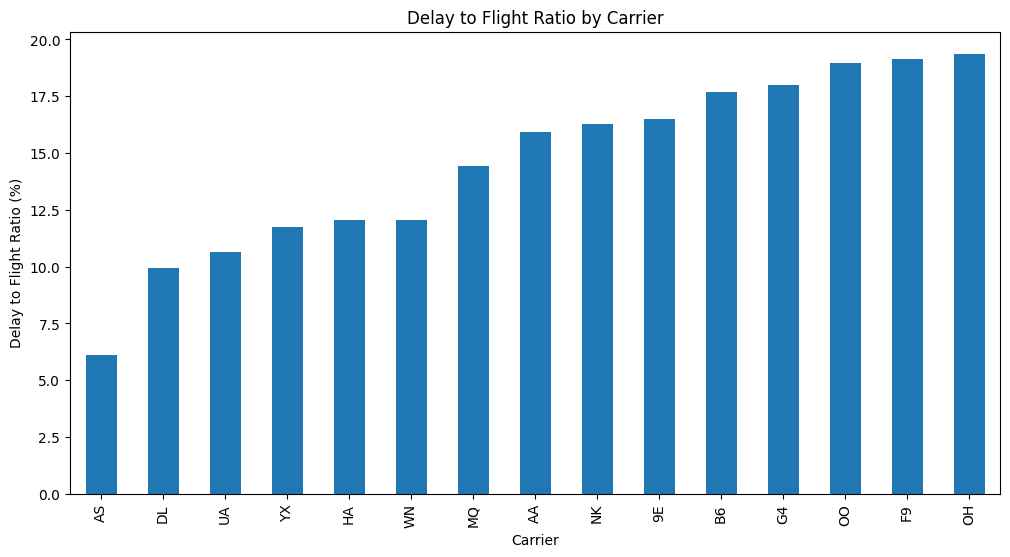

In [46]:
# Comparison of Performance of Carrier based on ratio minutes of delay / minutes of flight

fig = plt.figure(figsize=(12, 6))
((df.groupby('OP_UNIQUE_CARRIER').agg({'ARR_DELAY_NEW': 'sum', 'AIR_TIME': 'sum'})['ARR_DELAY_NEW'] / df.groupby('OP_UNIQUE_CARRIER').agg({'ARR_DELAY_NEW': 'sum', 'AIR_TIME': 'sum'})['AIR_TIME']) * 100).sort_values().plot(kind='bar')
plt.title('Delay to Flight Ratio by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Delay to Flight Ratio (%)')
plt.show();

#### Routes Analysis

In [49]:
# General Info
print('Total domestic Routes in 2023: ', len(df['ROUTE'].unique()))

Total domestic Routes in 2023:  6596


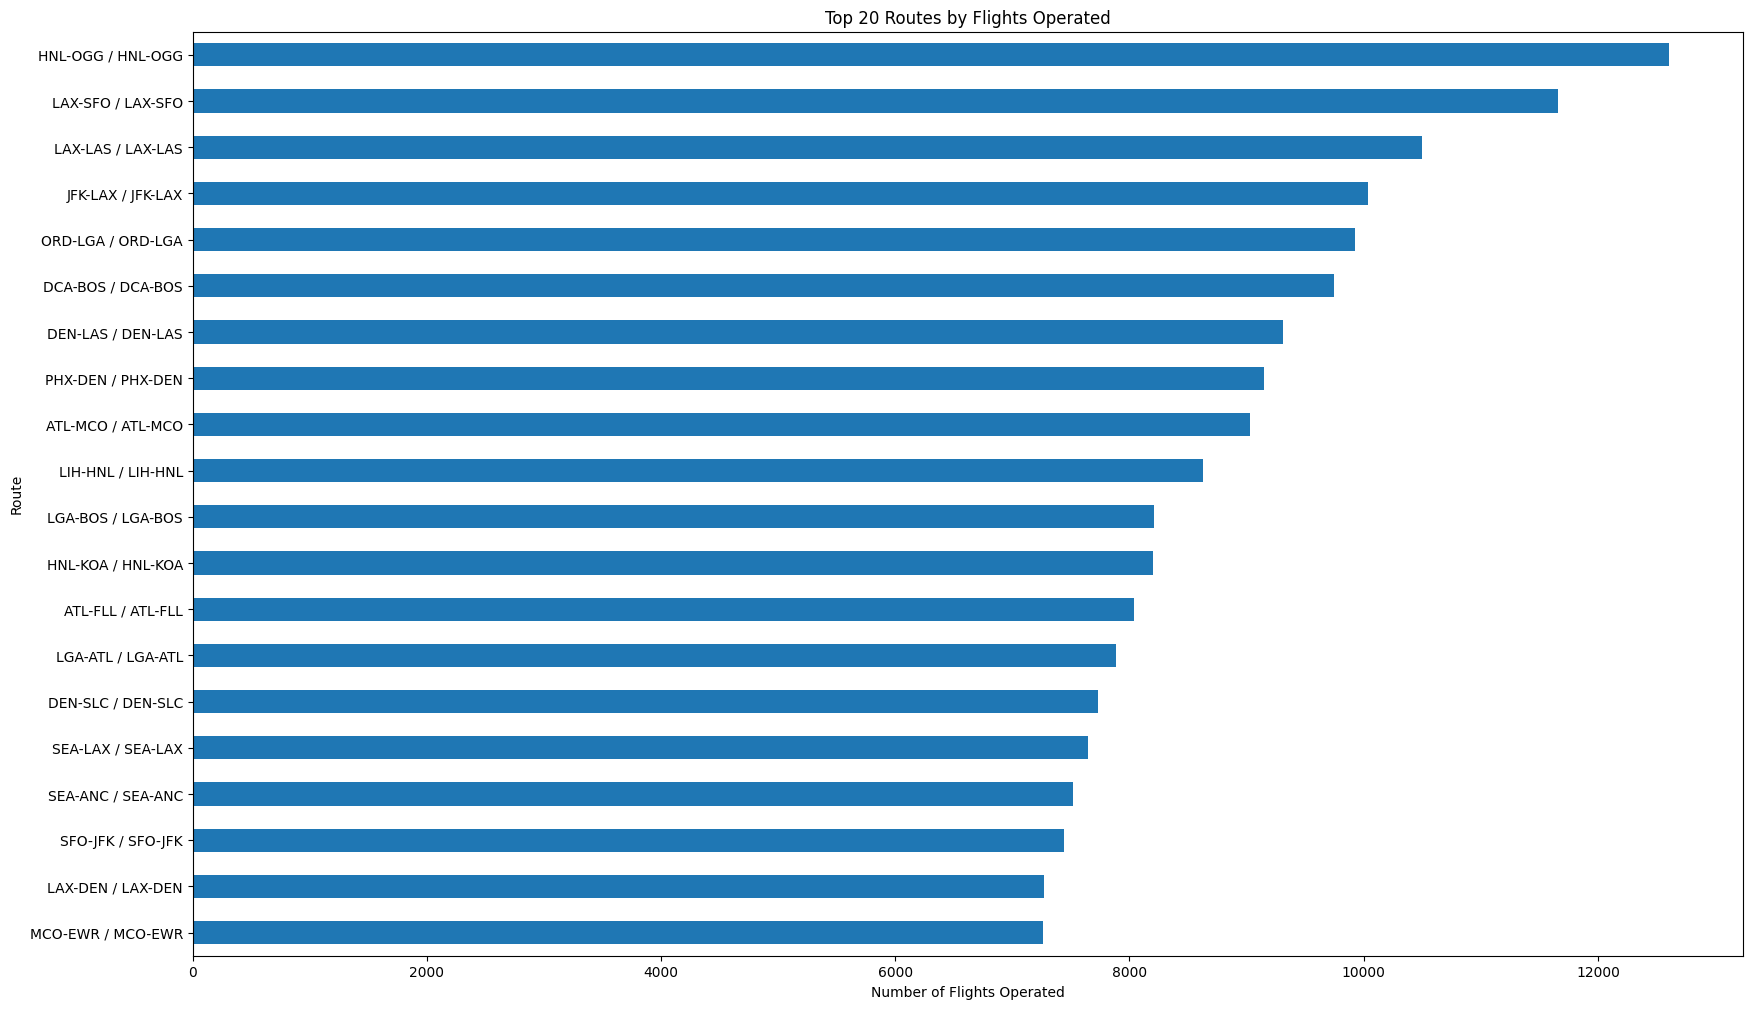

In [50]:
# Top 20 Route by Flights Operated

fig = plt.figure(figsize=(20, 12))
df['ROUTE'].value_counts().head(40).sort_values()[::2].plot(kind='barh')
plt.title('Top 20 Routes by Flights Operated')
plt.xlabel('Number of Flights Operated')
plt.ylabel('Route')

ytick_labels = []
for i in range(40):
    if i % 2 == 1:
        ytick_labels.append(df['ROUTE'].value_counts().head(40).sort_values().index[40-i])
ytick_labels = ytick_labels[::-1]
plt.yticks(range(len(ytick_labels)), [f"{route} / {ytick_labels[i]}" for i, route in enumerate(ytick_labels)])

plt.show();

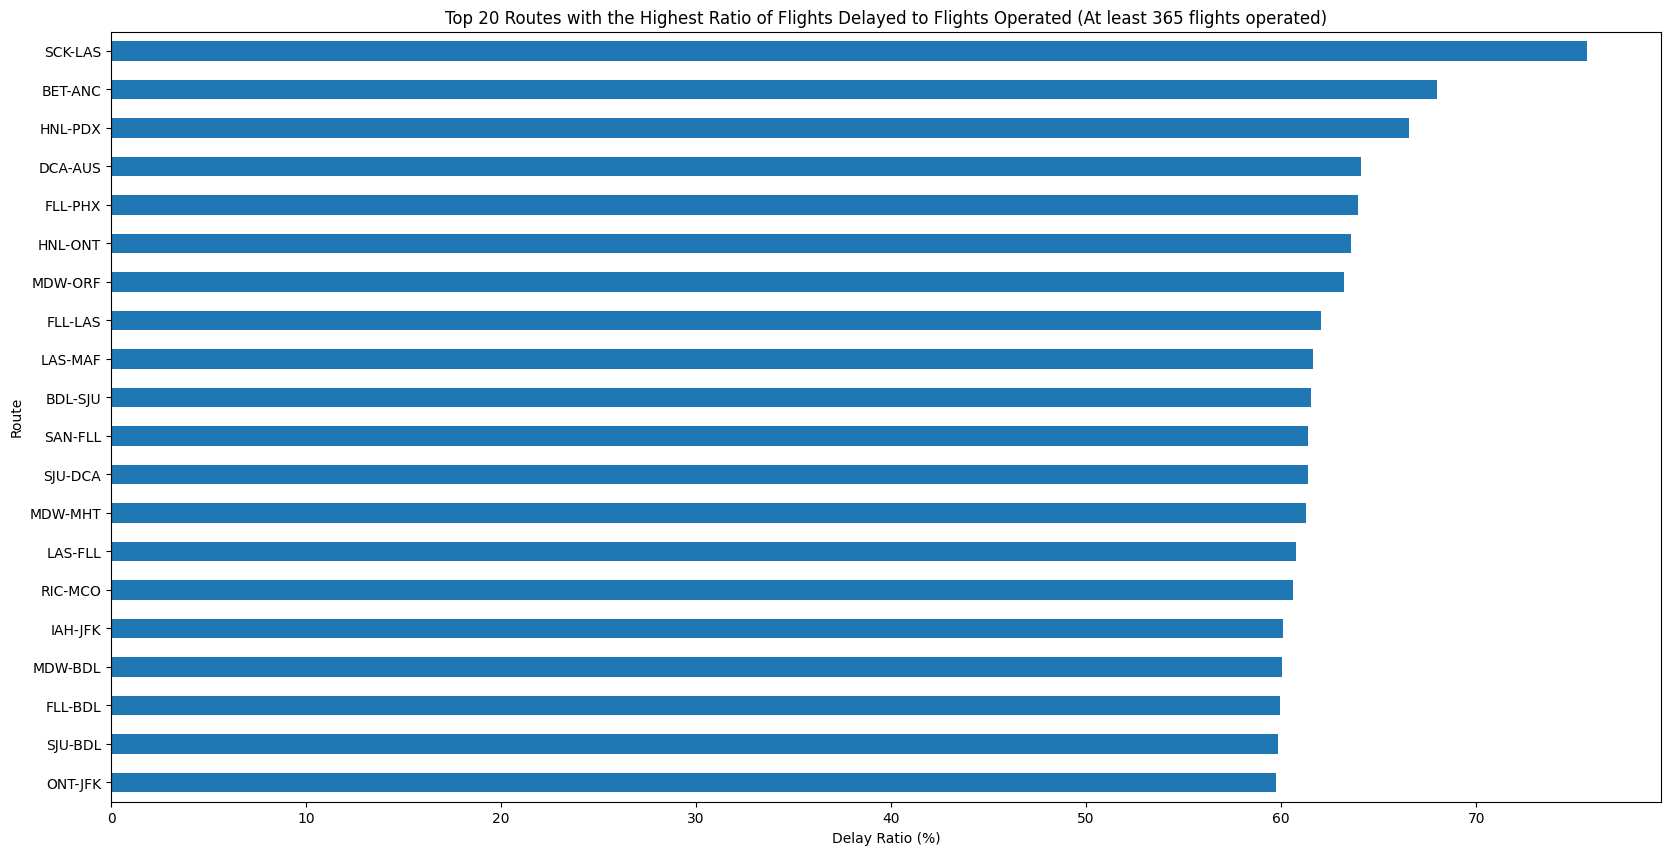

In [51]:
# Highest ratios of flights delayed to flights operated for each route with at least 365 flights operated

# Plot the highest ratios of flights delayed to flights operated for each route
fig = plt.figure(figsize=(20, 10))
df.groupby('ROUTE').filter(lambda x: len(x) >= 365).groupby('ROUTE').apply(lambda x: (x['ARR_DELAY_NEW'] > 0).sum() / len(x) * 100).nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Routes with the Highest Ratio of Flights Delayed to Flights Operated (At least 365 flights operated)')
plt.xlabel('Delay Ratio (%)')
plt.ylabel('Route')
plt.show();

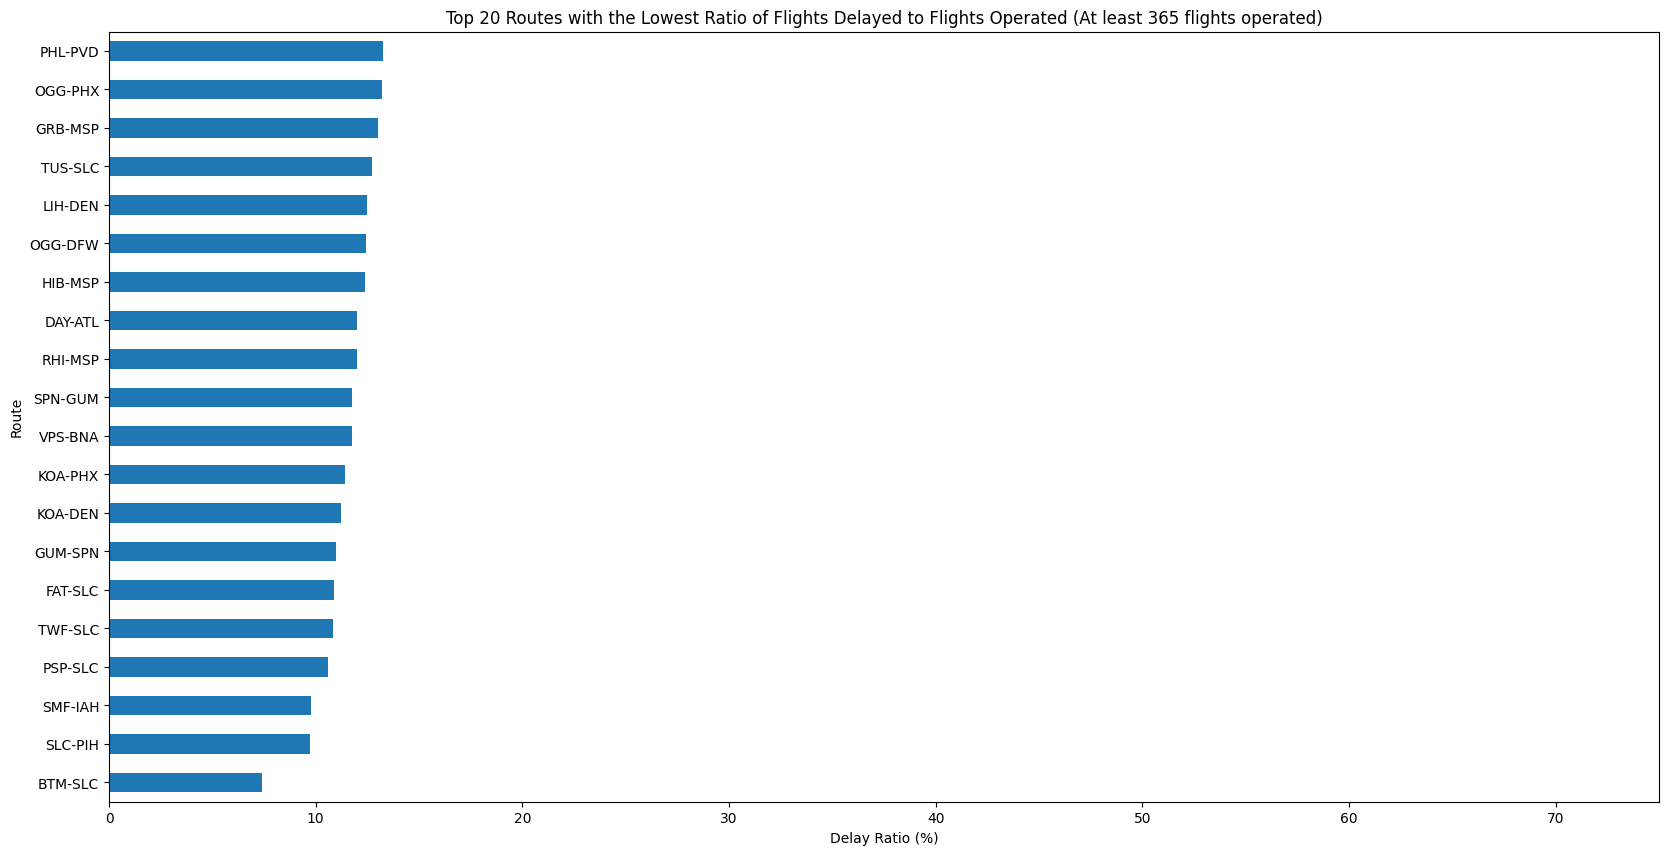

In [52]:
# Lowest ratios of flights delayed to flights operated for each route with at least 365 flights operated

# Plot the highest ratios of flights delayed to flights operated for each route
fig = plt.figure(figsize=(20, 10))
df.groupby('ROUTE').filter(lambda x: len(x) >= 365).groupby('ROUTE').apply(lambda x: (x['ARR_DELAY_NEW'] > 0).sum() / len(x) * 100).nsmallest(20).plot(kind='barh')
plt.title('Top 20 Routes with the Lowest Ratio of Flights Delayed to Flights Operated (At least 365 flights operated)')
plt.xlabel('Delay Ratio (%)')
plt.xlim(0,75)
plt.ylabel('Route')
plt.show();

#### Discover Potential Patterns

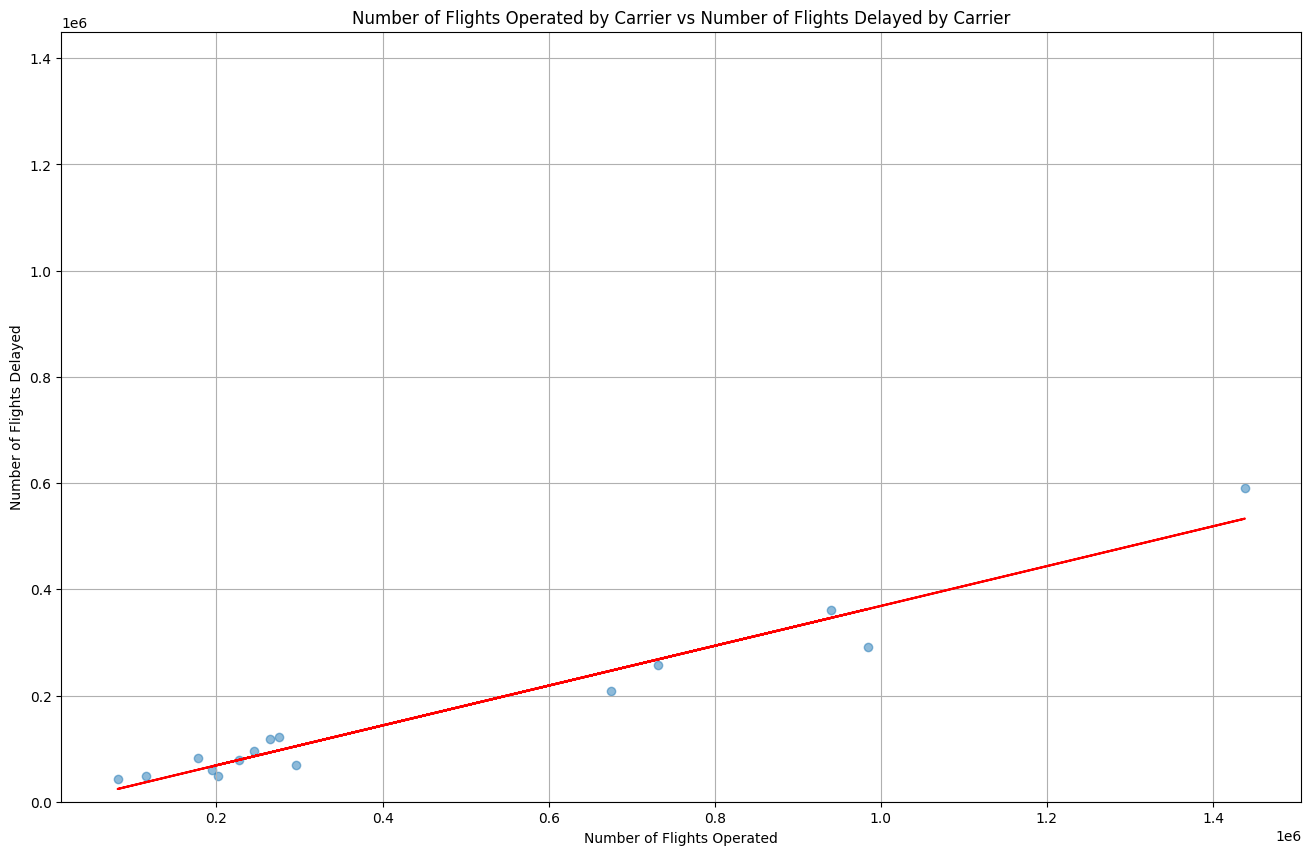

In [53]:
# Is there relationship between the Number of Flights operated by a Carrier and the Number of Flights Delayed?

fig = plt.figure(figsize=(16, 10))
plt.scatter(df.groupby('OP_UNIQUE_CARRIER').size(), df[df['ARR_DELAY_NEW'] > 0].groupby('OP_UNIQUE_CARRIER').size(), alpha=0.5)
plt.title('Number of Flights Operated by Carrier vs Number of Flights Delayed by Carrier')
plt.xlabel('Number of Flights Operated')
plt.ylabel('Number of Flights Delayed')
plt.ylim(0,1450000)
plt.grid()

# Fit a Linear Regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(df.groupby('OP_UNIQUE_CARRIER').size(), df[df['ARR_DELAY_NEW'] > 0].groupby('OP_UNIQUE_CARRIER').size())
plt.plot(df.groupby('OP_UNIQUE_CARRIER').size(), slope * df.groupby('OP_UNIQUE_CARRIER').size() + intercept, color='red')

plt.show();

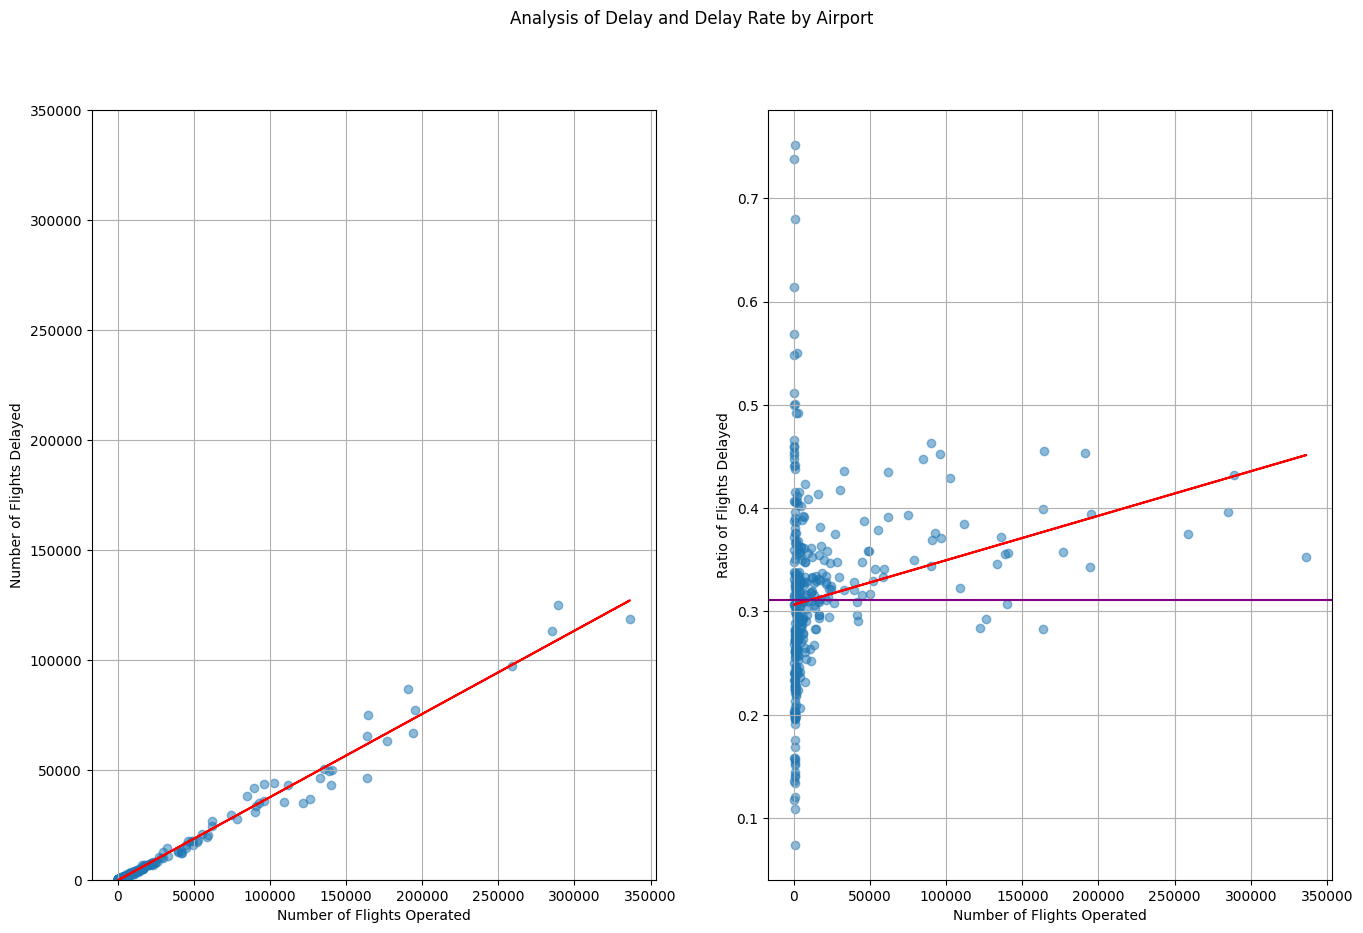

In [54]:
# Is there relationship between the Number of Flights operated by a Airport and the Number of Flights Delayed?

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(1, 2) #creates a figure with 1 row and 2 columns
#Create the subplots
plt1 = plt.subplot(gs[0, 0])
plt2 = plt.subplot(gs[0, 1])

fig.suptitle('Analysis of Delay and Delay Rate by Airport')

plt1.scatter(df.groupby('ORIGIN').size(), df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size(), alpha=0.5)
plt1.set_xlabel('Number of Flights Operated')
plt1.set_ylabel('Number of Flights Delayed')
plt1.set_ylim(0, 350000)
plt1.grid()

# Fit a Linear Regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(df.groupby('ORIGIN').size(), df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size())
plt1.plot(df.groupby('ORIGIN').size(), slope * df.groupby('ORIGIN').size() + intercept, color='red')

# Ratio
plt2.scatter(df.groupby('ORIGIN').size(), (df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size() / df.groupby('ORIGIN').size()), alpha=0.5)
plt2.set_xlabel('Number of Flights Operated')
plt2.set_ylabel('Ratio of Flights Delayed')
plt2.grid()

# Fit a Linear Regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(df.groupby('ORIGIN').size(), (df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size() / df.groupby('ORIGIN').size()))
plt2.plot(df.groupby('ORIGIN').size(), slope * df.groupby('ORIGIN').size() + intercept, color='red')

# Calculate median for Airports with less than 250000 flights operated
median_ratio = (df[df['ARR_DELAY_NEW'] > 0].groupby('ORIGIN').size() / df.groupby('ORIGIN').size())[df.groupby('ORIGIN').size() < 250000].median()
plt2.axhline(y=median_ratio, color='purple')

plt.show();

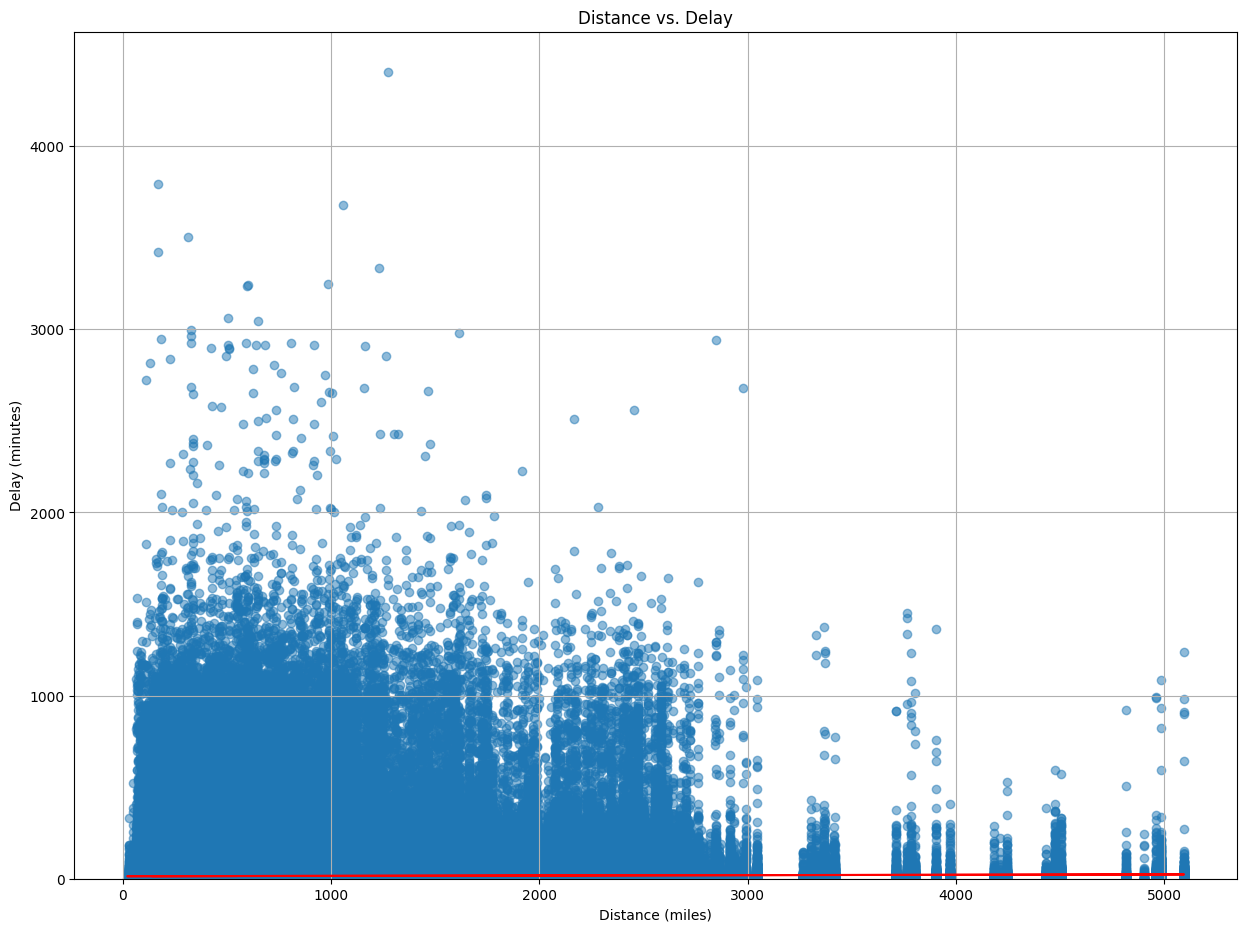

In [55]:
# Is there a relationship between Distance and Delay?

fig = plt.figure(figsize=(15, 11))
plt.scatter(df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['DISTANCE'],
            df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['ARR_DELAY_NEW'],
            alpha=0.5)
plt.title('Distance vs. Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Delay (minutes)')
plt.ylim(0,)
plt.grid()

# Fitting a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['DISTANCE'],
    df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['ARR_DELAY_NEW']
)
plt.plot(df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['DISTANCE'],
             slope * df[(~df['ARR_DELAY_NEW'].isnull()) & (df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]['DISTANCE'] + intercept,
             color='red')

plt.show();

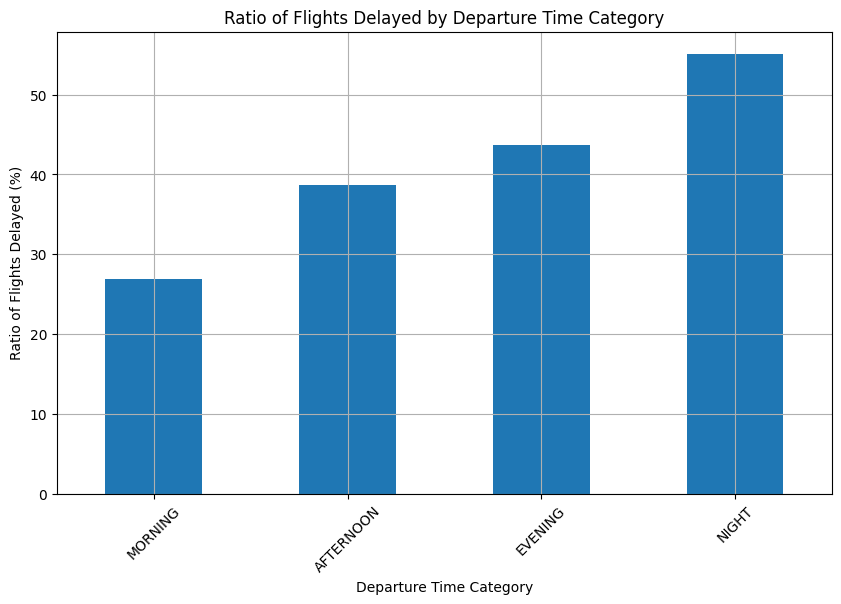

In [56]:
# Is there a relationship between Departure Time (morning, afternoon, evening, night) and Delay?

fig = plt.figure(figsize=(10, 6))
((df[df['ARR_DELAY_NEW'] > 0].groupby('DEP_TIME_CAT').size()) / (df.groupby('DEP_TIME_CAT').size()) * 100).reindex(['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT']).plot(kind='bar')
plt.title('Ratio of Flights Delayed by Departure Time Category')
plt.xlabel('Departure Time Category')
plt.ylabel('Ratio of Flights Delayed (%)')
plt.xticks(rotation=45)
plt.grid()

plt.show();

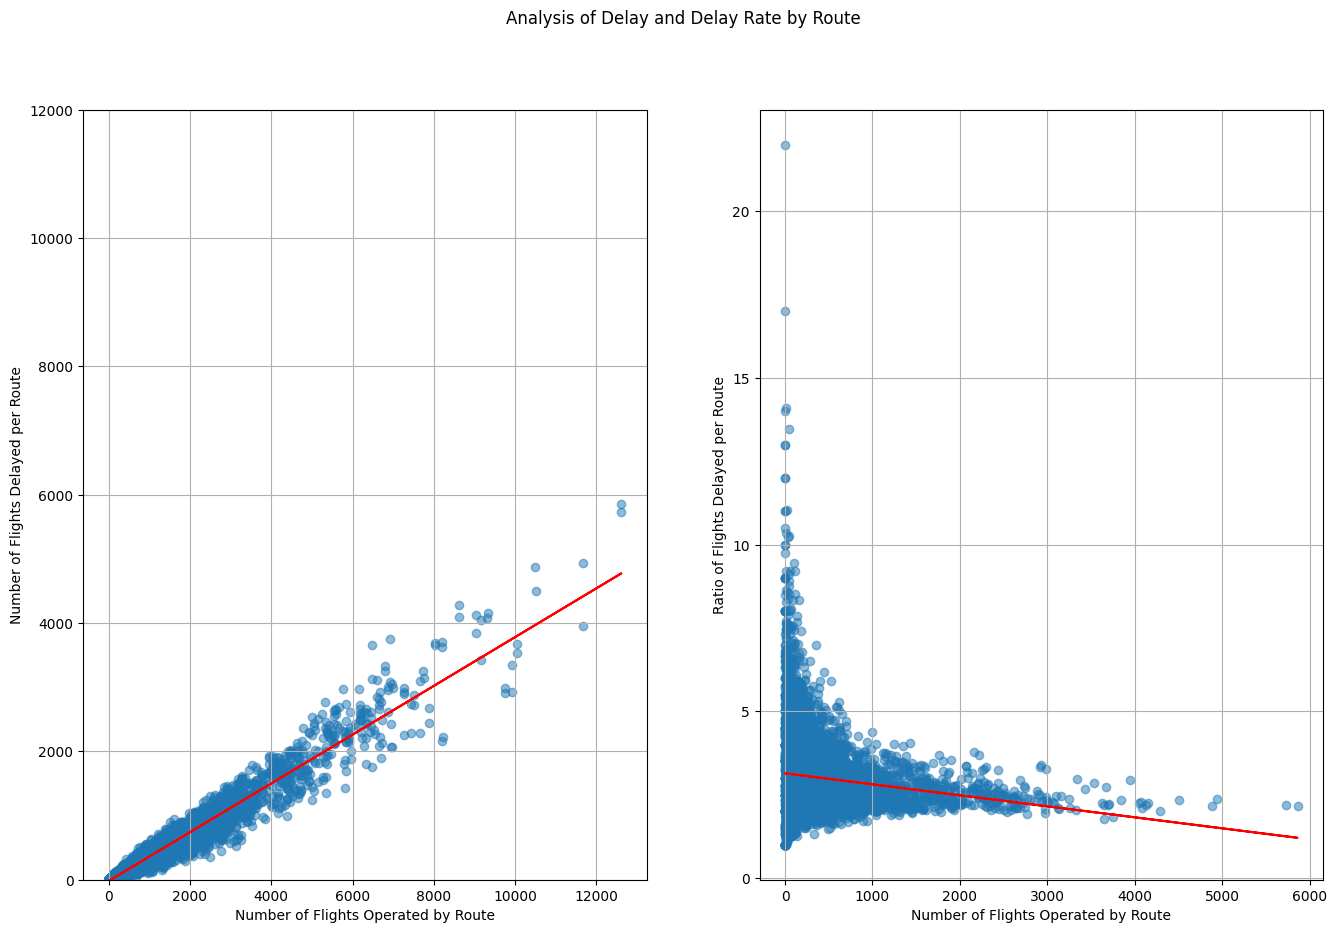

In [29]:
# Is there a relationship between the Number of Flights Delayed per Route and the Total Number of Flights Operated by Route?

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(1, 2) #creates a figure with 1 row and 2 columns
#Create the subplots
plt1 = plt.subplot(gs[0, 0])
plt2 = plt.subplot(gs[0, 1])

fig.suptitle('Analysis of Delay and Delay Rate by Route')

# Number of Flights Delayed per Route and the Total Number of Flights Operated by Route 
plt1.scatter(df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index], df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size(), alpha=0.5)
plt1.set_xlabel('Number of Flights Operated by Route')
plt1.set_ylabel('Number of Flights Delayed per Route')
plt1.set_ylim(0,12000)
plt1.grid()

# Fit a Linear Regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index], df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size())
plt1.plot(df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index], slope * df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index] + intercept, color='red')


# Ratio of Flights Delayed per Route by Total Number of Flight Operated by Route and the Total Number of Flights Operated by Route
plt2.scatter(df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size(), (df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index] /  df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size()), alpha=0.5)
plt2.set_xlabel('Number of Flights Operated by Route')
plt2.set_ylabel('Ratio of Flights Delayed per Route')
plt2.grid()

# Fit a Linear Regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size(), (df['ROUTE'].value_counts()[df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size().index] /  df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size()))
plt2.plot(df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size(), slope * df[df['ARR_DELAY_NEW'] > 0].groupby('ROUTE').size() + intercept, color='red')

plt.savefig('Analysis of Delay Rate by Route.png')

plt.show();

### Statistical Modelling

*Goal:* Application of Statistics for Data Science material covered in class.

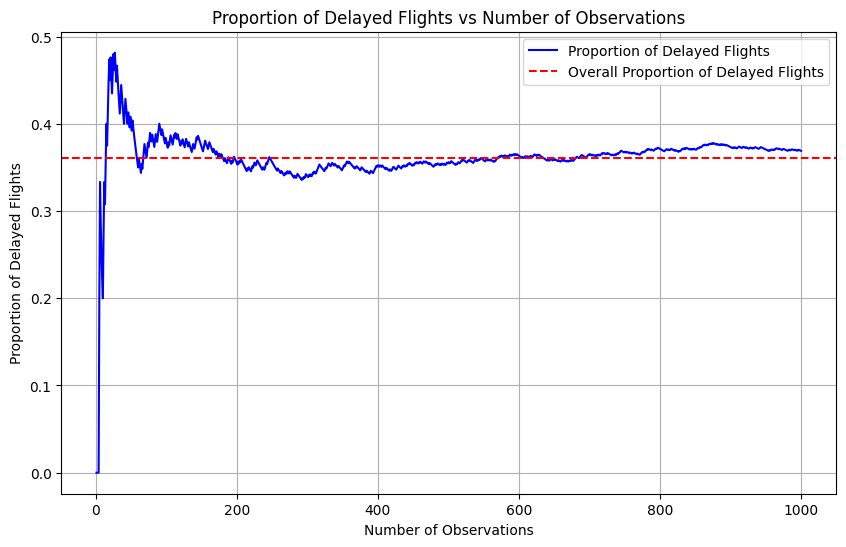

In [58]:
# Law of Large Number: as we increase the number of flights analyzed (observations),
# the proportion of delayed flights should converge to the overall proportion of delayed flights in the dataset.

total_proportion = len(df[df['ARR_DELAY_NEW'] > 0]) / len(df)

N = 1000 # Let's pick 1000 random observations from our df

sample_indices = np.random.choice(df.index, N, replace=False)
sample_df = df.loc[sample_indices]
proportion_delayed = np.cumsum(sample_df['ARR_DELAY_NEW'] > 0) / np.arange(1, N + 1)

fig = plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, N + 1), proportion_delayed, color='blue', label='Proportion of Delayed Flights')
plt.axhline(y=total_proportion, color='red', linestyle='--', label='Overall Proportion of Delayed Flights')
plt.title('Proportion of Delayed Flights vs Number of Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Proportion of Delayed Flights')
plt.legend()
plt.grid()
plt.show();

### Machine Learning Predictions

#### Step 1: Predict if a flight will be delayed

In [59]:
# Review of columns
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DATE',
       'DEP_TIME_CAT', 'DEP_MIN', 'DELAY_BIN', 'ORIGIN_POP', 'DEST_POP',
       'ORIGIN_CAT', 'DEST_CAT', 'DAY', 'ORIGIN_PERF', 'DEST_PERF', 'DEL_CAT',
       'ROUTE'],
      dtype='object')

In [60]:
# One-Hot Encoding for DEP_TIME_CAT
dummy_columns = pd.get_dummies(df['DEP_TIME_CAT'], prefix='DEP_TIME')
df = pd.concat([df, dummy_columns], axis=1)

df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DATE',
       'DEP_TIME_CAT', 'DEP_MIN', 'DELAY_BIN', 'ORIGIN_POP', 'DEST_POP',
       'ORIGIN_CAT', 'DEST_CAT', 'DAY', 'ORIGIN_PERF', 'DEST_PERF', 'DEL_CAT',
       'ROUTE', 'DEP_TIME_AFTERNOON', 'DEP_TIME_EVENING', 'DEP_TIME_MORNING',
       'DEP_TIME_NIGHT'],
      dtype='object')

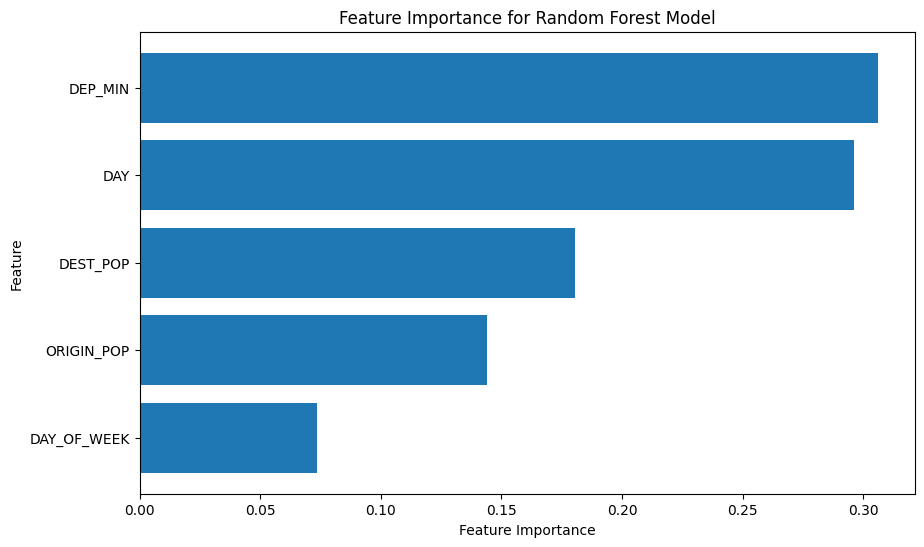

In [89]:
# Having the Carrier has pre-condition, train a RF model and print the variables' importance
# Feature: DAY, DEP_MIN, ORIGIN_CAT, DEST_CAT
# Target: DELAY_BIN

# Let's start considering American Airlines (TOP #3 Carrier for Number of Flights)
american = df[df['OP_UNIQUE_CARRIER'] == 'AA']
X = american[['DAY', 'DEP_MIN', 'DAY_OF_WEEK', 'ORIGIN_POP', 'DEST_POP']]
y = american['DELAY_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Plot feature importance
feature_importance = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::1]
feature_importance = feature_importance[sorted_indices]
feature_names = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.savefig('Feature Importance for Random Forest Model.png')

plt.show();

/var/folders/_v/jjmyq3tx43jd2jq594zrrh480000gn/T/ipykernel_14103/2301666578.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision[depth] = tp / (fp + tp)
/var/folders/_v/jjmyq3tx43jd2jq594zrrh480000gn/T/ipykernel_14103/2301666578.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision[depth] = tp / (fp + tp)
/var/folders/_v/jjmyq3tx43jd2jq594zrrh480000gn/T/ipykernel_14103/2301666578.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision[depth] = tp / (fp + tp)
/var/folders/_v/jjmyq3tx43jd2jq594zrrh480000gn/T/ipykernel_14103/2301666578.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision[depth] = tp / (fp + tp)
/var/folders/_v/jjmyq3tx43jd2jq594zrrh480000gn/T/ipykernel_14103/2301666578.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision[depth] = tp / (fp + tp)


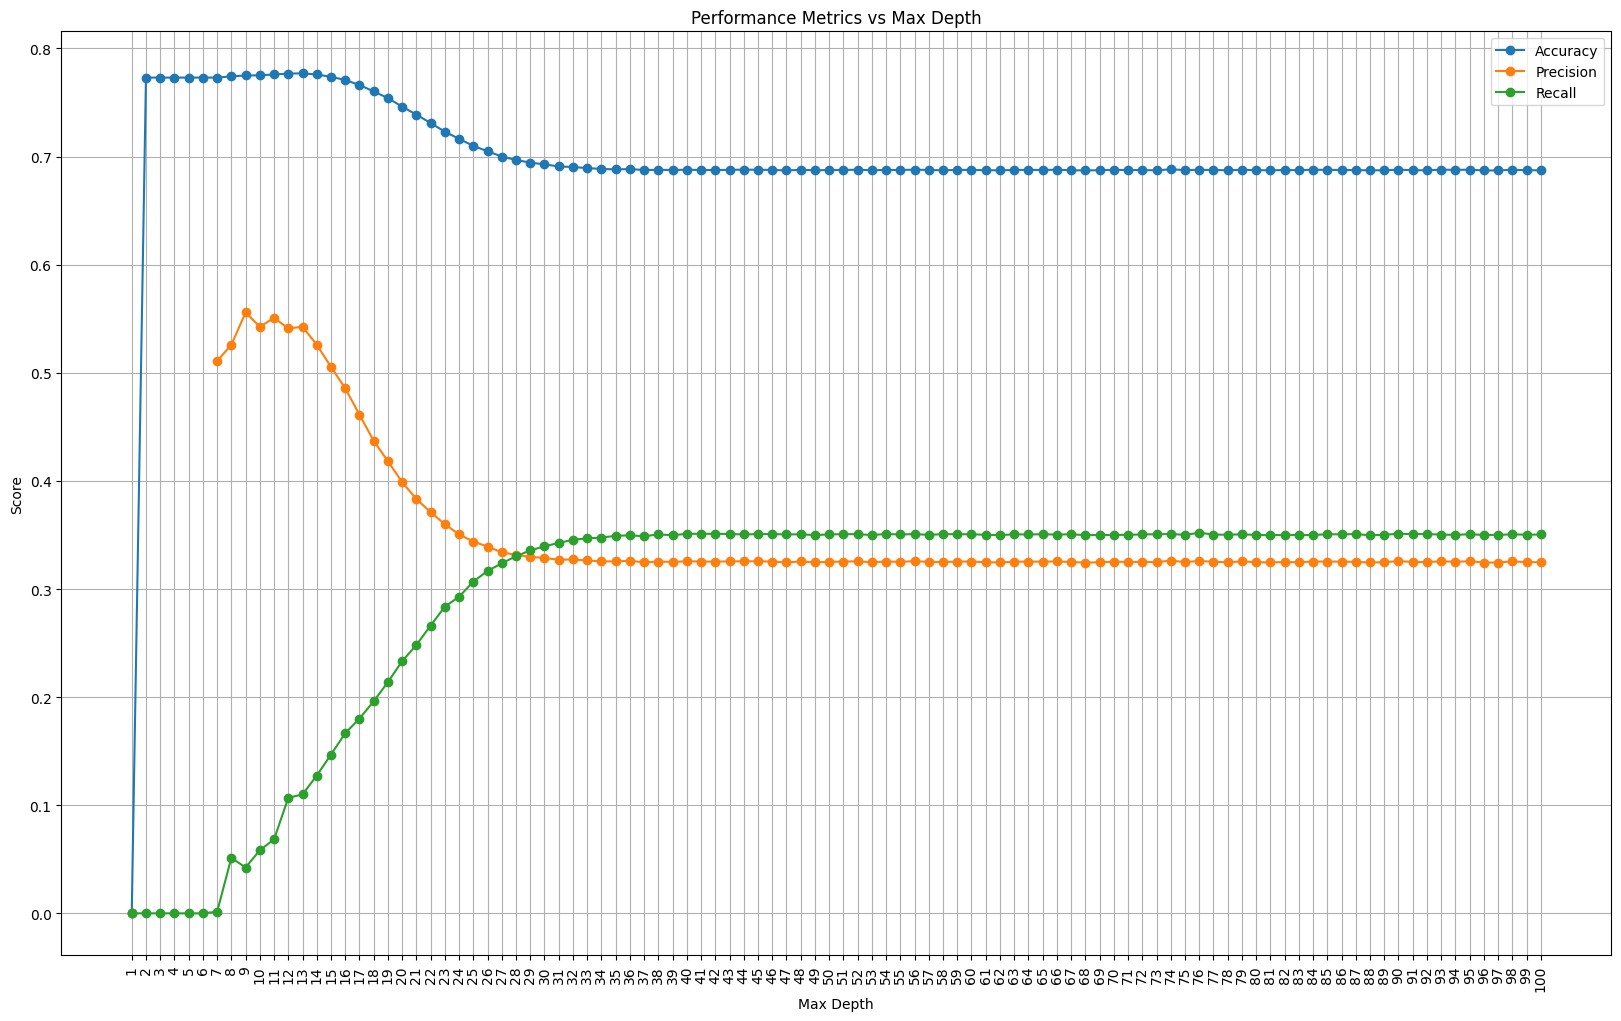

In [90]:
# Train Decision Tree Classifier models to find optimal max depth for the forest

accuracy = 100*[0]
precision = 100*[0]
recall = 100*[0]
for depth in range(1,100):
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy[depth] = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    precision[depth] = tp / (fp + tp)
    recall[depth] = tp / (tp + fn)

fig = plt.figure(figsize=(20, 12))

plt.plot(range(1,101), accuracy, label='Accuracy', marker='o') # accuracy
plt.plot(range(1,101), precision, label='Precision', marker='o') # precision
plt.plot(range(1,101), recall, label='Recall', marker='o') # recall

plt.title('Performance Metrics vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(range(1,101), rotation=90)
plt.legend()
plt.grid()
plt.savefig('Max Depth.png')

plt.show();

In [38]:
# Optimal max depth
depth = 28

Accuracy:  0.7722374145696266
Recall (TP Rate):  0.21437540998969168


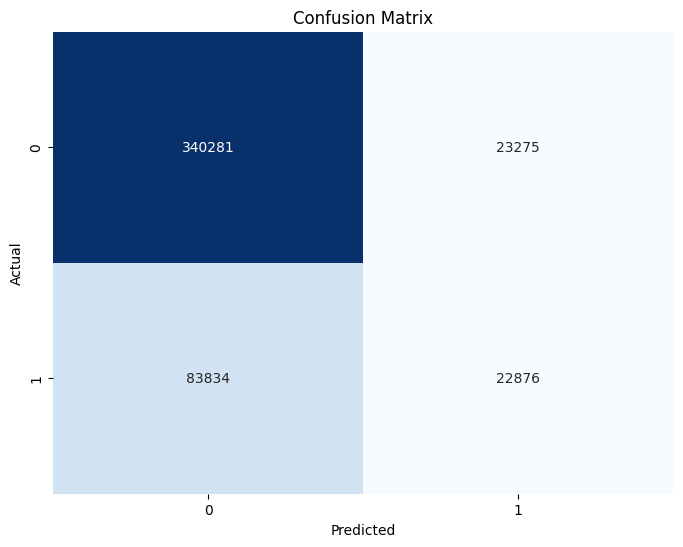

In [92]:
# Re-train the RF model for AA data and produce predictions

X = american[['DAY', 'DEP_MIN', 'DAY_OF_WEEK', 'ORIGIN_POP', 'DEST_POP']]
y = american['DELAY_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=depth)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall (TP Rate): ', recall_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
fig.savefig('Confusion Matrix 1.png')

plt.show();

Accuracy:  0.9976417551805896
Recall (TP Rate):  0.9896770580548815


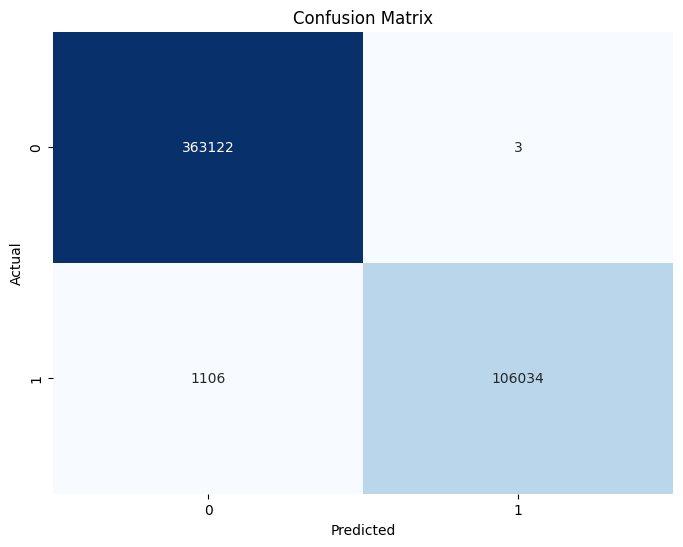

In [93]:
# Let's verify if the model is finding patterns in data by evaluating the training data
y_pred_tr = rf_model.predict(X_train)
print('Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Recall (TP Rate): ', recall_score(y_train, y_pred_tr))
conf_matrix = confusion_matrix(y_train, y_pred_tr)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix TR')
plt.show();

Before SMOTE:
Class 0 samples: 363125
Class 1 samples: 107140
After SMOTE:
Class 0 samples (oversampled): 363125
Class 1 samples (oversampled): 363125
Accuracy:  0.7005396945558471
Recall (TP Rate):  0.43270546340549154


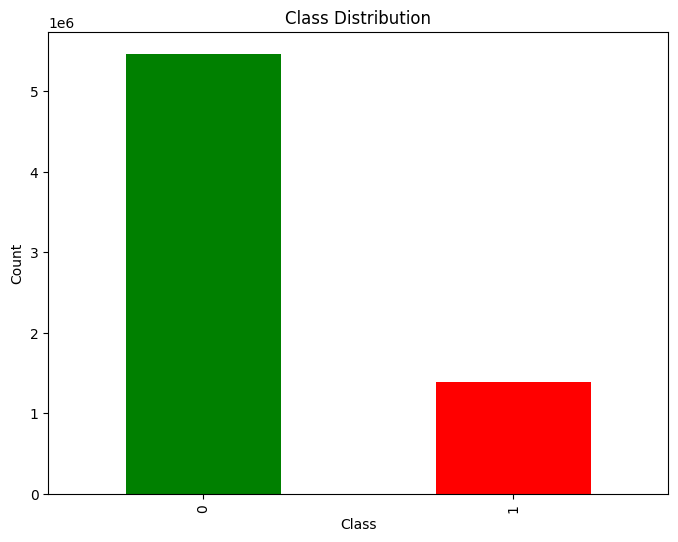

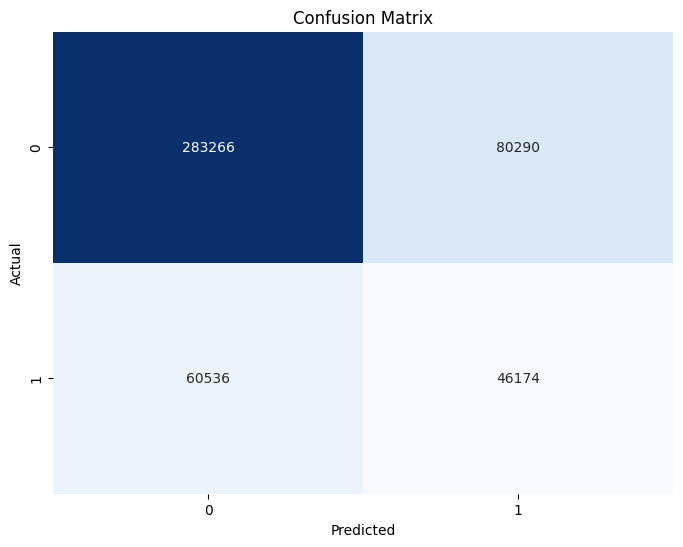

In [94]:
# The model performs pretty-well in identifying correctly the negative class, while very-bad in identifying the positive class
# Our goal: improve quality service -> we don't care too much in identify negative class, we need to predict flights that will be delayed,
# so we can adopt strategies to mitigate the economic / reputation consequences

# Dataset is imbalanced
fig = plt.figure(figsize=(8, 6))
df['DELAY_BIN'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
fig.savefig('Class Distribution.png')

# 1a) Oversampling
smote = SMOTE(random_state=0)
X_train_overs, y_train_overs = smote.fit_resample(X_train, y_train)
print("Before SMOTE:")
print("Class 0 samples:", sum(y_train == 0))
print("Class 1 samples:", sum(y_train == 1))
print("After SMOTE:")
print("Class 0 samples (oversampled):", sum(y_train_overs == 0))
print("Class 1 samples (oversampled):", sum(y_train_overs == 1))

rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=depth)
rf_model.fit(X_train_overs, y_train_overs)

y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall (TP Rate): ', recall_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix 2.png')

plt.show();

Before Under-Sampling:
Class 0 samples: 363125
Class 1 samples: 107140
After Under-Sampling:
Class 0 samples (undersampled): 107140
Class 1 samples (undersampled): 107140
Accuracy:  0.6276617914116691
Recall (TP Rate):  0.6188923249929716


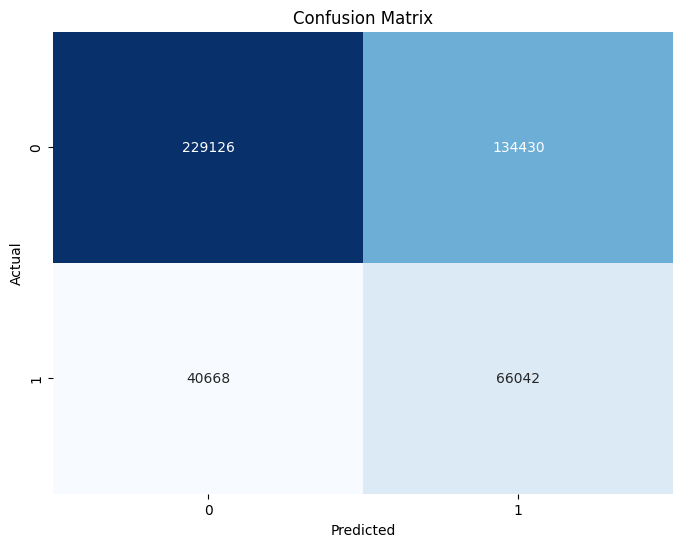

In [95]:
# 1b) Undersampling
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'majority')
X_train_unders, y_train_unders = rus.fit_resample(X_train, y_train)


print("Before Under-Sampling:")
print("Class 0 samples:", sum(y_train == 0))
print("Class 1 samples:", sum(y_train == 1))
print("After Under-Sampling:")
print("Class 0 samples (undersampled):", sum(y_train_unders == 0))
print("Class 1 samples (undersampled):", sum(y_train_unders == 1))

rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=depth)
rf_model.fit(X_train_unders, y_train_unders)

y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall (TP Rate): ', recall_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix 3.png')
plt.show();

Accuracy:  0.9997573268620497
Recall (TP Rate):  0.9999253313421691


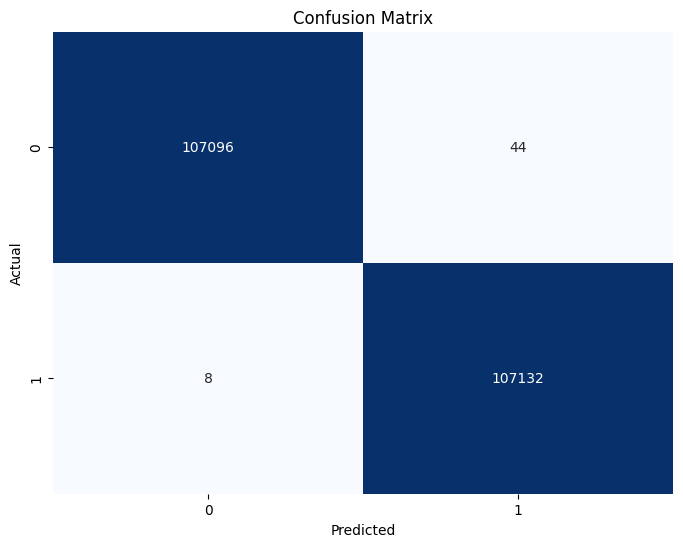

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=depth)
rf_model.fit(X_train_unders, y_train_unders)

y_pred = rf_model.predict(X_train_unders)

# Calculate evaluation metrics
print('Accuracy: ', accuracy_score(y_train_unders, y_pred))
print('Recall (TP Rate): ', recall_score(y_train_unders, y_pred))
conf_matrix = confusion_matrix(y_train_unders, y_pred)
# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix 3.png')
plt.show();

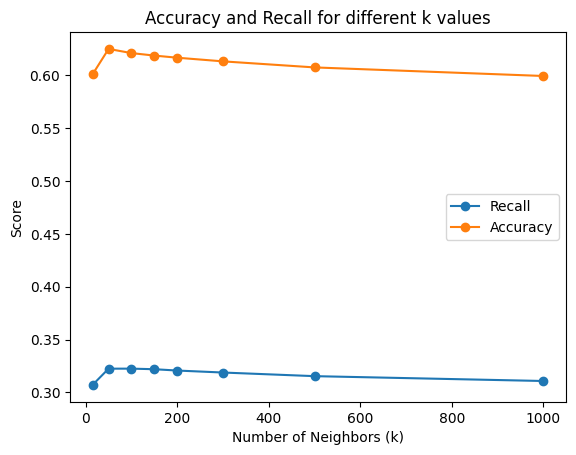

In [35]:
# KNN
american = df[df['OP_UNIQUE_CARRIER'] == 'AA']
X = american[['DAY', 'DEP_MIN', 'DAY_OF_WEEK', 'ORIGIN_POP', 'DEST_POP']]
y = american['DELAY_BIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'majority')
X_train_unders, y_train_unders = rus.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unders)
X_test_scaled = scaler.transform(X_test)

k_values = [15, 50, 100, 150, 200, 300, 500, 1000]

accuracy = []
recall = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train_unders)

    y_pred = knn_model.predict(X_test_scaled)
    
    acc = accuracy_score(y_pred, y_test)
    rec = recall_score(y_pred, y_test)
    
    accuracy.append(acc)
    recall.append(rec)

# Plot accuracy for different k values
plt.plot(k_values, recall, marker='o', label='Recall')
plt.plot(k_values, accuracy, marker='o', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Accuracy and Recall for different k values')
plt.legend()

plt.show();

Accuracy (KNN):  0.634566921784581
Recall (TP Rate) (KNN):  0.6133190218405824


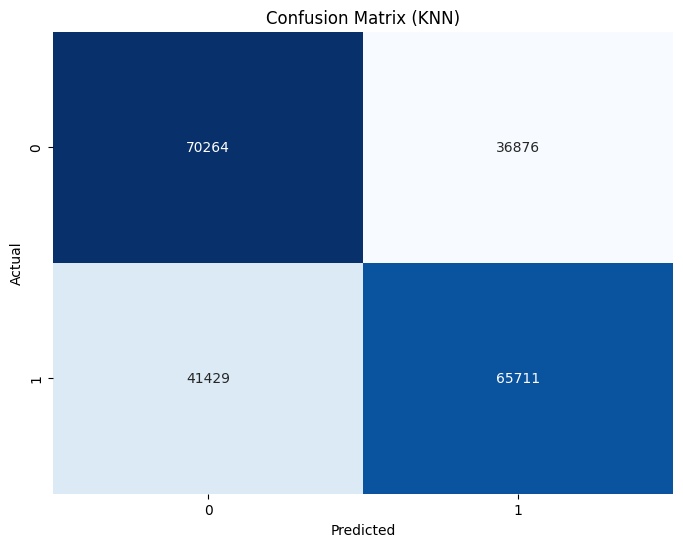

In [44]:
# Use the best k value to train the final KNN model
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train_scaled, y_train_unders)

y_pred = knn_model.predict(X_train_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train_unders, y_pred)
recall = recall_score(y_train_unders, y_pred)

print('Accuracy (KNN): ', accuracy)
print('Recall (TP Rate) (KNN): ', recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_unders, y_pred)

# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.savefig('Confusion Matrix KNN.png')
plt.show();

Accuracy (KNN):  0.6247506730233527
Recall (TP Rate) (KNN):  0.5938806110017806


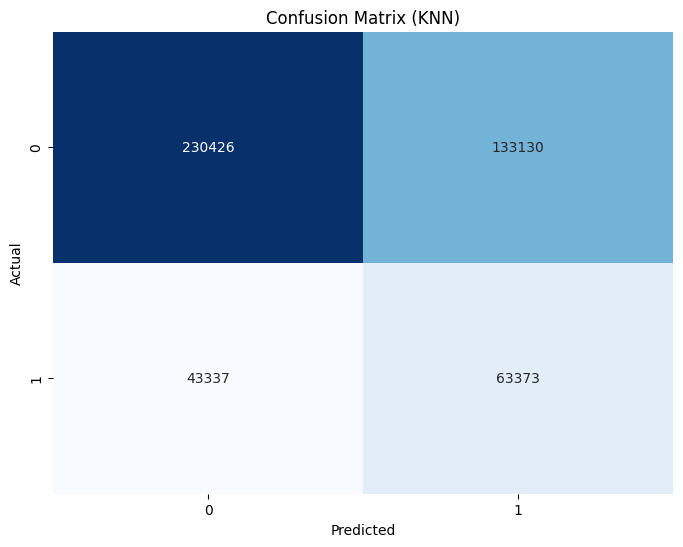

In [43]:
# Use the best k value to train the final KNN model
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train_scaled, y_train_unders)

y_pred = knn_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy (KNN): ', accuracy)
print('Recall (TP Rate) (KNN): ', recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.savefig('Confusion Matrix KNN.png')
plt.show();

Accuracy (KNN):  0.5542565271569707
Recall (TP Rate) (KNN):  0.6358635554306064


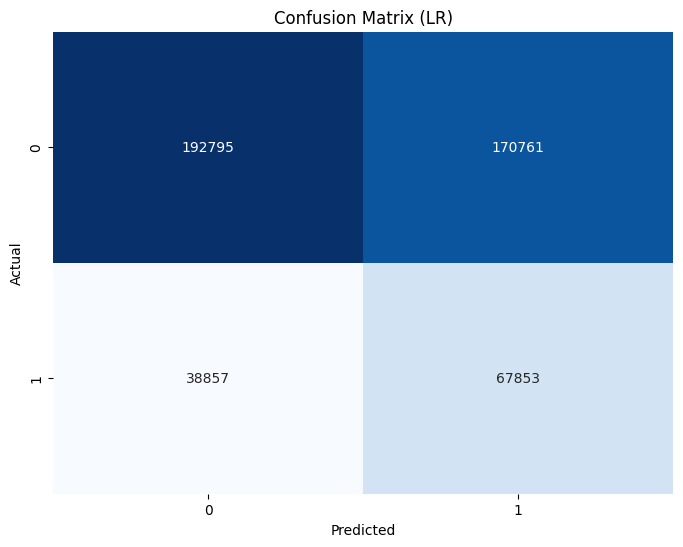

In [101]:
# Logistic Regression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_unders, y_train_unders)

y_pred = logistic_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy (KNN): ', accuracy)
print('Recall (TP Rate) (KNN): ', recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LR)')
plt.savefig('Confusion Matrix LR.png')
plt.show();

Accuracy (KNN):  0.5826488706365504
Recall (TP Rate) (KNN):  0.6336195631883517


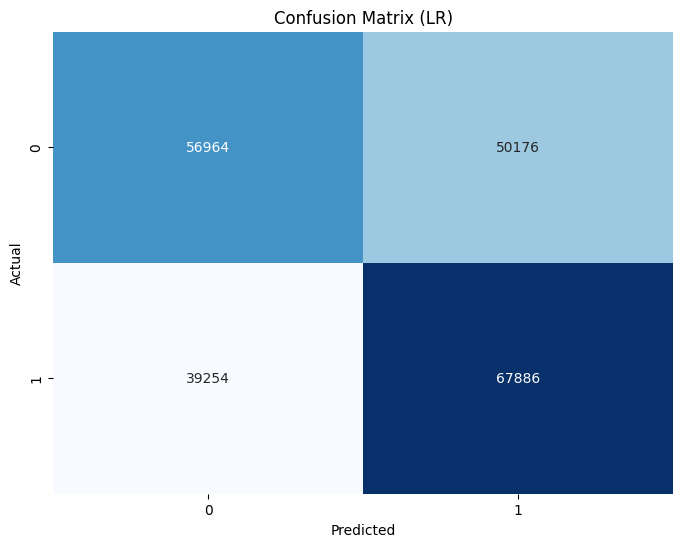

In [41]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_unders, y_train_unders)

y_pred = logistic_reg.predict(X_train_unders)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train_unders, y_pred)
recall = recall_score(y_train_unders, y_pred)

print('Accuracy (KNN): ', accuracy)
print('Recall (TP Rate) (KNN): ', recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_unders, y_pred)

# Plot the confusion matrix as a heatmap
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LR)')
plt.savefig('Confusion Matrix LR.png')
plt.show();

Accuracy (XGB):  0.6538724891869708
Recall (TP Rate) (XGB):  0.6331365382813232


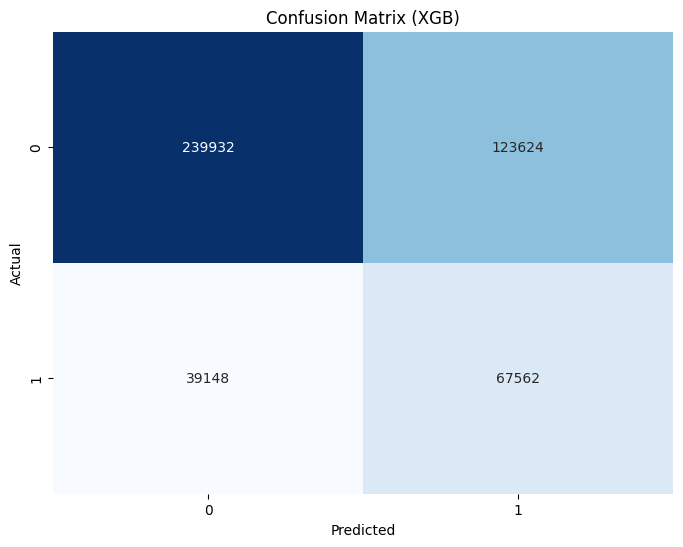

In [106]:
# XGBoost

xgb_classifier = XGBClassifier(objective='binary:logistic')
xgb_classifier.fit(X_train_unders, y_train_unders)

y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy (XGB): ', accuracy)
print('Recall (TP Rate) (XGB): ', recall)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGB)')
plt.savefig('Confusion Matrix XGB.png')

plt.show();

Accuracy (XGB):  0.6699645323875303
Recall (TP Rate) (XGB):  0.6547974612656338


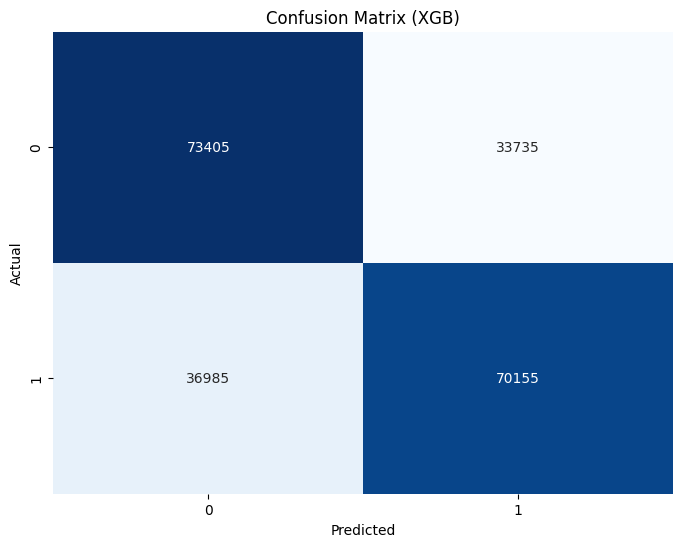

In [42]:
# XGBoost

xgb_classifier = XGBClassifier(objective='binary:logistic')
xgb_classifier.fit(X_train_unders, y_train_unders)

y_pred = xgb_classifier.predict(X_train_unders)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train_unders, y_pred)
recall = recall_score(y_train_unders, y_pred)

print('Accuracy (XGB): ', accuracy)
print('Recall (TP Rate) (XGB): ', recall)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_train_unders, y_pred)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGB)')
plt.savefig('Confusion Matrix XGB.png')

plt.show();

In [107]:
# Consider just flights from DFW
american_dfw = american[american['ORIGIN'] == 'DFW']

len(american_dfw)

162150

Accuracy (XGB):  0.6620043169904409
Recall (TP Rate) (XGB):  0.6526703830246359


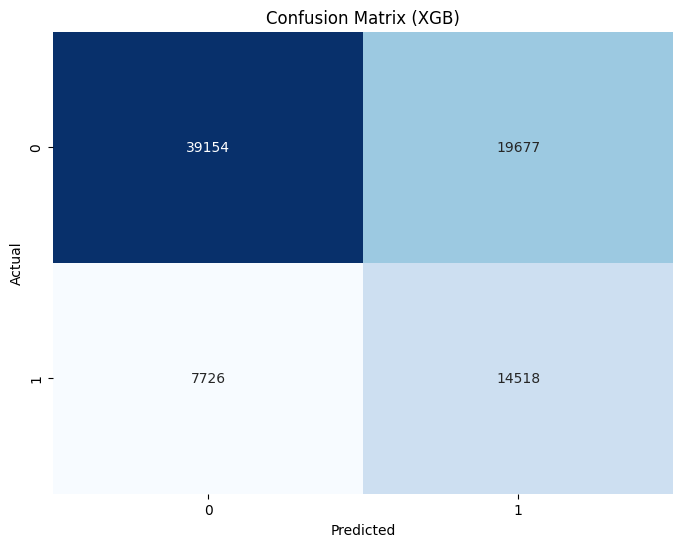

In [110]:
# Predict using XGBoost
X = american_dfw[['DAY', 'DEP_MIN', 'DAY_OF_WEEK', 'DEST_POP']]
y = american_dfw['DELAY_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'majority')
X_train_unders, y_train_unders = rus.fit_resample(X_train, y_train)

xgb_classifier = XGBClassifier(objective='binary:logistic')
xgb_classifier.fit(X_train_unders, y_train_unders)

y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy (XGB): ', accuracy)
print('Recall (TP Rate) (XGB): ', recall)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGB)')
plt.savefig('Confusion Matrix AA-DFW XGB.png')

plt.show();